In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.autograd import Variable
from torch.nn.functional import relu

In [10]:
print('test')

test


In [18]:
print('test')
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1=nn.Linear(1, 20)
        self.l2=nn.Linear(20, 20)
        self.l3=nn.Linear(20, 20)
        self.l4=nn.Linear(20, 20)
        self.l5=nn.Linear(20, 1)
        
    def forward(self, x):
        out=torch.tanh(self.l1(x)) #does not work wth only relu, tanh better than sigmoid
        out=torch.tanh(self.l2(out))
        out=torch.tanh(self.l3(out))
        out=torch.tanh(self.l4(out))
        out=self.l5(out)
        return out
k=1
m=1
def f(net,t):
    u=net(t)
    #v = torch.autograd.grad(u, t, create_graph=True,grad_outputs=torch.ones_like(u))[0] is the same
    v = torch.autograd.grad(u.sum(), t, create_graph=True)[0]
    a = torch.autograd.grad(v.sum(), t, create_graph=True)[0]
    
    mse1=nn.MSELoss()
    pt02 = Variable(torch.from_numpy(np.zeros((100,1))).float(), requires_grad=False).to(device)
    return mse1(k*u+m*a,pt02)

def u_err(net,t0,u0):
    u=net(t0)
    
    mse1=nn.MSELoss()
    return mse1(u,u0)

def u_err_v(net,t0,v0):
    u=net(t0)
    v0net=torch.autograd.grad(u.sum(), t0, create_graph=True)[0]
    
    mse1=nn.MSELoss()
    return mse1(v0net,v0)


test
Using cpu device


In [20]:

model = NeuralNetwork().to(device)
#optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
optimizer=torch.optim.Adam(model.parameters())
for i in range(20000):
    optimizer.zero_grad()
    t_bc=np.array([[0.0]])
    u_bc=np.array([[0.0]])
    v_bc=np.array([[1.0]])
    pt_t_bc = Variable(torch.from_numpy(t_bc).float(), requires_grad=True).to(device)
    pt_u_bc = Variable(torch.from_numpy(u_bc).float(), requires_grad=False).to(device)
    pt_v_bc = Variable(torch.from_numpy(v_bc).float(), requires_grad=False).to(device)
    
    loss1=u_err(model,pt_t_bc,pt_u_bc)+u_err_v(model,pt_t_bc,pt_v_bc)

    t=np.random.rand(100,1)*10.0#*min((3+7.0/10000.0*i),10.0)
    pt_t= Variable(torch.from_numpy(t).float(), requires_grad=True).to(device)
    
    loss2=f(model,pt_t)
    
    loss = loss1+loss2

    # Backpropagation
    loss.backward()
    optimizer.step()
    print(i)
    print(loss)

0
tensor(1.0445, grad_fn=<AddBackward0>)
1
tensor(1.0229, grad_fn=<AddBackward0>)
2
tensor(1.0019, grad_fn=<AddBackward0>)
3
tensor(0.9825, grad_fn=<AddBackward0>)
4
tensor(0.9641, grad_fn=<AddBackward0>)
5
tensor(0.9463, grad_fn=<AddBackward0>)
6
tensor(0.9296, grad_fn=<AddBackward0>)
7
tensor(0.9134, grad_fn=<AddBackward0>)
8
tensor(0.8972, grad_fn=<AddBackward0>)
9
tensor(0.8808, grad_fn=<AddBackward0>)
10
tensor(0.8652, grad_fn=<AddBackward0>)
11
tensor(0.8487, grad_fn=<AddBackward0>)
12
tensor(0.8327, grad_fn=<AddBackward0>)
13
tensor(0.8129, grad_fn=<AddBackward0>)
14
tensor(0.7994, grad_fn=<AddBackward0>)
15
tensor(0.7793, grad_fn=<AddBackward0>)
16
tensor(0.7570, grad_fn=<AddBackward0>)
17
tensor(0.7393, grad_fn=<AddBackward0>)
18
tensor(0.7168, grad_fn=<AddBackward0>)
19
tensor(0.6910, grad_fn=<AddBackward0>)
20
tensor(0.6756, grad_fn=<AddBackward0>)
21
tensor(0.6576, grad_fn=<AddBackward0>)
22
tensor(0.6304, grad_fn=<AddBackward0>)
23
tensor(0.6121, grad_fn=<AddBackward0>)
24

202
tensor(0.0574, grad_fn=<AddBackward0>)
203
tensor(0.0439, grad_fn=<AddBackward0>)
204
tensor(0.0534, grad_fn=<AddBackward0>)
205
tensor(0.0411, grad_fn=<AddBackward0>)
206
tensor(0.0509, grad_fn=<AddBackward0>)
207
tensor(0.0415, grad_fn=<AddBackward0>)
208
tensor(0.0399, grad_fn=<AddBackward0>)
209
tensor(0.0471, grad_fn=<AddBackward0>)
210
tensor(0.0495, grad_fn=<AddBackward0>)
211
tensor(0.0443, grad_fn=<AddBackward0>)
212
tensor(0.0554, grad_fn=<AddBackward0>)
213
tensor(0.0562, grad_fn=<AddBackward0>)
214
tensor(0.0522, grad_fn=<AddBackward0>)
215
tensor(0.0449, grad_fn=<AddBackward0>)
216
tensor(0.0282, grad_fn=<AddBackward0>)
217
tensor(0.0516, grad_fn=<AddBackward0>)
218
tensor(0.0628, grad_fn=<AddBackward0>)
219
tensor(0.0507, grad_fn=<AddBackward0>)
220
tensor(0.0395, grad_fn=<AddBackward0>)
221
tensor(0.0442, grad_fn=<AddBackward0>)
222
tensor(0.0331, grad_fn=<AddBackward0>)
223
tensor(0.0549, grad_fn=<AddBackward0>)
224
tensor(0.0492, grad_fn=<AddBackward0>)
225
tensor(

419
tensor(0.0438, grad_fn=<AddBackward0>)
420
tensor(0.0516, grad_fn=<AddBackward0>)
421
tensor(0.0505, grad_fn=<AddBackward0>)
422
tensor(0.0444, grad_fn=<AddBackward0>)
423
tensor(0.0468, grad_fn=<AddBackward0>)
424
tensor(0.0370, grad_fn=<AddBackward0>)
425
tensor(0.0422, grad_fn=<AddBackward0>)
426
tensor(0.0577, grad_fn=<AddBackward0>)
427
tensor(0.0411, grad_fn=<AddBackward0>)
428
tensor(0.0487, grad_fn=<AddBackward0>)
429
tensor(0.0423, grad_fn=<AddBackward0>)
430
tensor(0.0477, grad_fn=<AddBackward0>)
431
tensor(0.0449, grad_fn=<AddBackward0>)
432
tensor(0.0423, grad_fn=<AddBackward0>)
433
tensor(0.0455, grad_fn=<AddBackward0>)
434
tensor(0.0315, grad_fn=<AddBackward0>)
435
tensor(0.0401, grad_fn=<AddBackward0>)
436
tensor(0.0394, grad_fn=<AddBackward0>)
437
tensor(0.0444, grad_fn=<AddBackward0>)
438
tensor(0.0454, grad_fn=<AddBackward0>)
439
tensor(0.0537, grad_fn=<AddBackward0>)
440
tensor(0.0452, grad_fn=<AddBackward0>)
441
tensor(0.0435, grad_fn=<AddBackward0>)
442
tensor(

627
tensor(0.0413, grad_fn=<AddBackward0>)
628
tensor(0.0354, grad_fn=<AddBackward0>)
629
tensor(0.0384, grad_fn=<AddBackward0>)
630
tensor(0.0364, grad_fn=<AddBackward0>)
631
tensor(0.0348, grad_fn=<AddBackward0>)
632
tensor(0.0491, grad_fn=<AddBackward0>)
633
tensor(0.0369, grad_fn=<AddBackward0>)
634
tensor(0.0373, grad_fn=<AddBackward0>)
635
tensor(0.0276, grad_fn=<AddBackward0>)
636
tensor(0.0308, grad_fn=<AddBackward0>)
637
tensor(0.0460, grad_fn=<AddBackward0>)
638
tensor(0.0289, grad_fn=<AddBackward0>)
639
tensor(0.0273, grad_fn=<AddBackward0>)
640
tensor(0.0416, grad_fn=<AddBackward0>)
641
tensor(0.0405, grad_fn=<AddBackward0>)
642
tensor(0.0323, grad_fn=<AddBackward0>)
643
tensor(0.0316, grad_fn=<AddBackward0>)
644
tensor(0.0228, grad_fn=<AddBackward0>)
645
tensor(0.0342, grad_fn=<AddBackward0>)
646
tensor(0.0383, grad_fn=<AddBackward0>)
647
tensor(0.0339, grad_fn=<AddBackward0>)
648
tensor(0.0370, grad_fn=<AddBackward0>)
649
tensor(0.0396, grad_fn=<AddBackward0>)
650
tensor(

824
tensor(0.0269, grad_fn=<AddBackward0>)
825
tensor(0.0368, grad_fn=<AddBackward0>)
826
tensor(0.0355, grad_fn=<AddBackward0>)
827
tensor(0.0265, grad_fn=<AddBackward0>)
828
tensor(0.0266, grad_fn=<AddBackward0>)
829
tensor(0.0347, grad_fn=<AddBackward0>)
830
tensor(0.0283, grad_fn=<AddBackward0>)
831
tensor(0.0328, grad_fn=<AddBackward0>)
832
tensor(0.0296, grad_fn=<AddBackward0>)
833
tensor(0.0304, grad_fn=<AddBackward0>)
834
tensor(0.0271, grad_fn=<AddBackward0>)
835
tensor(0.0294, grad_fn=<AddBackward0>)
836
tensor(0.0387, grad_fn=<AddBackward0>)
837
tensor(0.0275, grad_fn=<AddBackward0>)
838
tensor(0.0365, grad_fn=<AddBackward0>)
839
tensor(0.0439, grad_fn=<AddBackward0>)
840
tensor(0.0338, grad_fn=<AddBackward0>)
841
tensor(0.0354, grad_fn=<AddBackward0>)
842
tensor(0.0308, grad_fn=<AddBackward0>)
843
tensor(0.0264, grad_fn=<AddBackward0>)
844
tensor(0.0306, grad_fn=<AddBackward0>)
845
tensor(0.0353, grad_fn=<AddBackward0>)
846
tensor(0.0239, grad_fn=<AddBackward0>)
847
tensor(

1042
tensor(0.0337, grad_fn=<AddBackward0>)
1043
tensor(0.0323, grad_fn=<AddBackward0>)
1044
tensor(0.0296, grad_fn=<AddBackward0>)
1045
tensor(0.0289, grad_fn=<AddBackward0>)
1046
tensor(0.0333, grad_fn=<AddBackward0>)
1047
tensor(0.0315, grad_fn=<AddBackward0>)
1048
tensor(0.0298, grad_fn=<AddBackward0>)
1049
tensor(0.0327, grad_fn=<AddBackward0>)
1050
tensor(0.0392, grad_fn=<AddBackward0>)
1051
tensor(0.0305, grad_fn=<AddBackward0>)
1052
tensor(0.0306, grad_fn=<AddBackward0>)
1053
tensor(0.0376, grad_fn=<AddBackward0>)
1054
tensor(0.0346, grad_fn=<AddBackward0>)
1055
tensor(0.0311, grad_fn=<AddBackward0>)
1056
tensor(0.0260, grad_fn=<AddBackward0>)
1057
tensor(0.0291, grad_fn=<AddBackward0>)
1058
tensor(0.0277, grad_fn=<AddBackward0>)
1059
tensor(0.0337, grad_fn=<AddBackward0>)
1060
tensor(0.0330, grad_fn=<AddBackward0>)
1061
tensor(0.0262, grad_fn=<AddBackward0>)
1062
tensor(0.0292, grad_fn=<AddBackward0>)
1063
tensor(0.0265, grad_fn=<AddBackward0>)
1064
tensor(0.0291, grad_fn=<Add

1235
tensor(0.0224, grad_fn=<AddBackward0>)
1236
tensor(0.0238, grad_fn=<AddBackward0>)
1237
tensor(0.0321, grad_fn=<AddBackward0>)
1238
tensor(0.0257, grad_fn=<AddBackward0>)
1239
tensor(0.0264, grad_fn=<AddBackward0>)
1240
tensor(0.0260, grad_fn=<AddBackward0>)
1241
tensor(0.0338, grad_fn=<AddBackward0>)
1242
tensor(0.0300, grad_fn=<AddBackward0>)
1243
tensor(0.0319, grad_fn=<AddBackward0>)
1244
tensor(0.0302, grad_fn=<AddBackward0>)
1245
tensor(0.0357, grad_fn=<AddBackward0>)
1246
tensor(0.0306, grad_fn=<AddBackward0>)
1247
tensor(0.0320, grad_fn=<AddBackward0>)
1248
tensor(0.0259, grad_fn=<AddBackward0>)
1249
tensor(0.0285, grad_fn=<AddBackward0>)
1250
tensor(0.0314, grad_fn=<AddBackward0>)
1251
tensor(0.0310, grad_fn=<AddBackward0>)
1252
tensor(0.0300, grad_fn=<AddBackward0>)
1253
tensor(0.0290, grad_fn=<AddBackward0>)
1254
tensor(0.0356, grad_fn=<AddBackward0>)
1255
tensor(0.0304, grad_fn=<AddBackward0>)
1256
tensor(0.0317, grad_fn=<AddBackward0>)
1257
tensor(0.0300, grad_fn=<Add

1437
tensor(0.0309, grad_fn=<AddBackward0>)
1438
tensor(0.0324, grad_fn=<AddBackward0>)
1439
tensor(0.0336, grad_fn=<AddBackward0>)
1440
tensor(0.0305, grad_fn=<AddBackward0>)
1441
tensor(0.0288, grad_fn=<AddBackward0>)
1442
tensor(0.0338, grad_fn=<AddBackward0>)
1443
tensor(0.0363, grad_fn=<AddBackward0>)
1444
tensor(0.0326, grad_fn=<AddBackward0>)
1445
tensor(0.0317, grad_fn=<AddBackward0>)
1446
tensor(0.0290, grad_fn=<AddBackward0>)
1447
tensor(0.0295, grad_fn=<AddBackward0>)
1448
tensor(0.0318, grad_fn=<AddBackward0>)
1449
tensor(0.0258, grad_fn=<AddBackward0>)
1450
tensor(0.0326, grad_fn=<AddBackward0>)
1451
tensor(0.0277, grad_fn=<AddBackward0>)
1452
tensor(0.0270, grad_fn=<AddBackward0>)
1453
tensor(0.0269, grad_fn=<AddBackward0>)
1454
tensor(0.0301, grad_fn=<AddBackward0>)
1455
tensor(0.0270, grad_fn=<AddBackward0>)
1456
tensor(0.0298, grad_fn=<AddBackward0>)
1457
tensor(0.0351, grad_fn=<AddBackward0>)
1458
tensor(0.0278, grad_fn=<AddBackward0>)
1459
tensor(0.0356, grad_fn=<Add

1630
tensor(0.0263, grad_fn=<AddBackward0>)
1631
tensor(0.0339, grad_fn=<AddBackward0>)
1632
tensor(0.0267, grad_fn=<AddBackward0>)
1633
tensor(0.0306, grad_fn=<AddBackward0>)
1634
tensor(0.0270, grad_fn=<AddBackward0>)
1635
tensor(0.0251, grad_fn=<AddBackward0>)
1636
tensor(0.0316, grad_fn=<AddBackward0>)
1637
tensor(0.0329, grad_fn=<AddBackward0>)
1638
tensor(0.0263, grad_fn=<AddBackward0>)
1639
tensor(0.0365, grad_fn=<AddBackward0>)
1640
tensor(0.0284, grad_fn=<AddBackward0>)
1641
tensor(0.0257, grad_fn=<AddBackward0>)
1642
tensor(0.0303, grad_fn=<AddBackward0>)
1643
tensor(0.0303, grad_fn=<AddBackward0>)
1644
tensor(0.0290, grad_fn=<AddBackward0>)
1645
tensor(0.0273, grad_fn=<AddBackward0>)
1646
tensor(0.0288, grad_fn=<AddBackward0>)
1647
tensor(0.0291, grad_fn=<AddBackward0>)
1648
tensor(0.0271, grad_fn=<AddBackward0>)
1649
tensor(0.0281, grad_fn=<AddBackward0>)
1650
tensor(0.0340, grad_fn=<AddBackward0>)
1651
tensor(0.0303, grad_fn=<AddBackward0>)
1652
tensor(0.0356, grad_fn=<Add

1837
tensor(0.0253, grad_fn=<AddBackward0>)
1838
tensor(0.0303, grad_fn=<AddBackward0>)
1839
tensor(0.0305, grad_fn=<AddBackward0>)
1840
tensor(0.0279, grad_fn=<AddBackward0>)
1841
tensor(0.0282, grad_fn=<AddBackward0>)
1842
tensor(0.0264, grad_fn=<AddBackward0>)
1843
tensor(0.0282, grad_fn=<AddBackward0>)
1844
tensor(0.0260, grad_fn=<AddBackward0>)
1845
tensor(0.0286, grad_fn=<AddBackward0>)
1846
tensor(0.0271, grad_fn=<AddBackward0>)
1847
tensor(0.0307, grad_fn=<AddBackward0>)
1848
tensor(0.0289, grad_fn=<AddBackward0>)
1849
tensor(0.0303, grad_fn=<AddBackward0>)
1850
tensor(0.0251, grad_fn=<AddBackward0>)
1851
tensor(0.0266, grad_fn=<AddBackward0>)
1852
tensor(0.0292, grad_fn=<AddBackward0>)
1853
tensor(0.0299, grad_fn=<AddBackward0>)
1854
tensor(0.0279, grad_fn=<AddBackward0>)
1855
tensor(0.0267, grad_fn=<AddBackward0>)
1856
tensor(0.0288, grad_fn=<AddBackward0>)
1857
tensor(0.0312, grad_fn=<AddBackward0>)
1858
tensor(0.0284, grad_fn=<AddBackward0>)
1859
tensor(0.0338, grad_fn=<Add

2061
tensor(0.0261, grad_fn=<AddBackward0>)
2062
tensor(0.0298, grad_fn=<AddBackward0>)
2063
tensor(0.0256, grad_fn=<AddBackward0>)
2064
tensor(0.0291, grad_fn=<AddBackward0>)
2065
tensor(0.0282, grad_fn=<AddBackward0>)
2066
tensor(0.0311, grad_fn=<AddBackward0>)
2067
tensor(0.0273, grad_fn=<AddBackward0>)
2068
tensor(0.0254, grad_fn=<AddBackward0>)
2069
tensor(0.0289, grad_fn=<AddBackward0>)
2070
tensor(0.0312, grad_fn=<AddBackward0>)
2071
tensor(0.0310, grad_fn=<AddBackward0>)
2072
tensor(0.0289, grad_fn=<AddBackward0>)
2073
tensor(0.0300, grad_fn=<AddBackward0>)
2074
tensor(0.0299, grad_fn=<AddBackward0>)
2075
tensor(0.0325, grad_fn=<AddBackward0>)
2076
tensor(0.0270, grad_fn=<AddBackward0>)
2077
tensor(0.0310, grad_fn=<AddBackward0>)
2078
tensor(0.0292, grad_fn=<AddBackward0>)
2079
tensor(0.0290, grad_fn=<AddBackward0>)
2080
tensor(0.0231, grad_fn=<AddBackward0>)
2081
tensor(0.0300, grad_fn=<AddBackward0>)
2082
tensor(0.0289, grad_fn=<AddBackward0>)
2083
tensor(0.0257, grad_fn=<Add

2251
tensor(0.0298, grad_fn=<AddBackward0>)
2252
tensor(0.0267, grad_fn=<AddBackward0>)
2253
tensor(0.0317, grad_fn=<AddBackward0>)
2254
tensor(0.0297, grad_fn=<AddBackward0>)
2255
tensor(0.0333, grad_fn=<AddBackward0>)
2256
tensor(0.0281, grad_fn=<AddBackward0>)
2257
tensor(0.0292, grad_fn=<AddBackward0>)
2258
tensor(0.0246, grad_fn=<AddBackward0>)
2259
tensor(0.0273, grad_fn=<AddBackward0>)
2260
tensor(0.0277, grad_fn=<AddBackward0>)
2261
tensor(0.0273, grad_fn=<AddBackward0>)
2262
tensor(0.0303, grad_fn=<AddBackward0>)
2263
tensor(0.0224, grad_fn=<AddBackward0>)
2264
tensor(0.0345, grad_fn=<AddBackward0>)
2265
tensor(0.0243, grad_fn=<AddBackward0>)
2266
tensor(0.0279, grad_fn=<AddBackward0>)
2267
tensor(0.0281, grad_fn=<AddBackward0>)
2268
tensor(0.0290, grad_fn=<AddBackward0>)
2269
tensor(0.0306, grad_fn=<AddBackward0>)
2270
tensor(0.0282, grad_fn=<AddBackward0>)
2271
tensor(0.0289, grad_fn=<AddBackward0>)
2272
tensor(0.0211, grad_fn=<AddBackward0>)
2273
tensor(0.0300, grad_fn=<Add

2465
tensor(0.0284, grad_fn=<AddBackward0>)
2466
tensor(0.0271, grad_fn=<AddBackward0>)
2467
tensor(0.0291, grad_fn=<AddBackward0>)
2468
tensor(0.0335, grad_fn=<AddBackward0>)
2469
tensor(0.0247, grad_fn=<AddBackward0>)
2470
tensor(0.0304, grad_fn=<AddBackward0>)
2471
tensor(0.0277, grad_fn=<AddBackward0>)
2472
tensor(0.0262, grad_fn=<AddBackward0>)
2473
tensor(0.0217, grad_fn=<AddBackward0>)
2474
tensor(0.0266, grad_fn=<AddBackward0>)
2475
tensor(0.0345, grad_fn=<AddBackward0>)
2476
tensor(0.0304, grad_fn=<AddBackward0>)
2477
tensor(0.0283, grad_fn=<AddBackward0>)
2478
tensor(0.0308, grad_fn=<AddBackward0>)
2479
tensor(0.0237, grad_fn=<AddBackward0>)
2480
tensor(0.0253, grad_fn=<AddBackward0>)
2481
tensor(0.0277, grad_fn=<AddBackward0>)
2482
tensor(0.0325, grad_fn=<AddBackward0>)
2483
tensor(0.0292, grad_fn=<AddBackward0>)
2484
tensor(0.0285, grad_fn=<AddBackward0>)
2485
tensor(0.0298, grad_fn=<AddBackward0>)
2486
tensor(0.0246, grad_fn=<AddBackward0>)
2487
tensor(0.0294, grad_fn=<Add

2661
tensor(0.0301, grad_fn=<AddBackward0>)
2662
tensor(0.0273, grad_fn=<AddBackward0>)
2663
tensor(0.0234, grad_fn=<AddBackward0>)
2664
tensor(0.0319, grad_fn=<AddBackward0>)
2665
tensor(0.0269, grad_fn=<AddBackward0>)
2666
tensor(0.0259, grad_fn=<AddBackward0>)
2667
tensor(0.0273, grad_fn=<AddBackward0>)
2668
tensor(0.0324, grad_fn=<AddBackward0>)
2669
tensor(0.0310, grad_fn=<AddBackward0>)
2670
tensor(0.0266, grad_fn=<AddBackward0>)
2671
tensor(0.0276, grad_fn=<AddBackward0>)
2672
tensor(0.0281, grad_fn=<AddBackward0>)
2673
tensor(0.0283, grad_fn=<AddBackward0>)
2674
tensor(0.0306, grad_fn=<AddBackward0>)
2675
tensor(0.0295, grad_fn=<AddBackward0>)
2676
tensor(0.0235, grad_fn=<AddBackward0>)
2677
tensor(0.0211, grad_fn=<AddBackward0>)
2678
tensor(0.0288, grad_fn=<AddBackward0>)
2679
tensor(0.0293, grad_fn=<AddBackward0>)
2680
tensor(0.0262, grad_fn=<AddBackward0>)
2681
tensor(0.0264, grad_fn=<AddBackward0>)
2682
tensor(0.0268, grad_fn=<AddBackward0>)
2683
tensor(0.0273, grad_fn=<Add

2866
tensor(0.0279, grad_fn=<AddBackward0>)
2867
tensor(0.0283, grad_fn=<AddBackward0>)
2868
tensor(0.0256, grad_fn=<AddBackward0>)
2869
tensor(0.0237, grad_fn=<AddBackward0>)
2870
tensor(0.0296, grad_fn=<AddBackward0>)
2871
tensor(0.0285, grad_fn=<AddBackward0>)
2872
tensor(0.0284, grad_fn=<AddBackward0>)
2873
tensor(0.0283, grad_fn=<AddBackward0>)
2874
tensor(0.0290, grad_fn=<AddBackward0>)
2875
tensor(0.0277, grad_fn=<AddBackward0>)
2876
tensor(0.0259, grad_fn=<AddBackward0>)
2877
tensor(0.0283, grad_fn=<AddBackward0>)
2878
tensor(0.0259, grad_fn=<AddBackward0>)
2879
tensor(0.0280, grad_fn=<AddBackward0>)
2880
tensor(0.0253, grad_fn=<AddBackward0>)
2881
tensor(0.0267, grad_fn=<AddBackward0>)
2882
tensor(0.0239, grad_fn=<AddBackward0>)
2883
tensor(0.0287, grad_fn=<AddBackward0>)
2884
tensor(0.0276, grad_fn=<AddBackward0>)
2885
tensor(0.0297, grad_fn=<AddBackward0>)
2886
tensor(0.0327, grad_fn=<AddBackward0>)
2887
tensor(0.0280, grad_fn=<AddBackward0>)
2888
tensor(0.0246, grad_fn=<Add

3069
tensor(0.0257, grad_fn=<AddBackward0>)
3070
tensor(0.0253, grad_fn=<AddBackward0>)
3071
tensor(0.0262, grad_fn=<AddBackward0>)
3072
tensor(0.0255, grad_fn=<AddBackward0>)
3073
tensor(0.0287, grad_fn=<AddBackward0>)
3074
tensor(0.0237, grad_fn=<AddBackward0>)
3075
tensor(0.0251, grad_fn=<AddBackward0>)
3076
tensor(0.0285, grad_fn=<AddBackward0>)
3077
tensor(0.0249, grad_fn=<AddBackward0>)
3078
tensor(0.0229, grad_fn=<AddBackward0>)
3079
tensor(0.0289, grad_fn=<AddBackward0>)
3080
tensor(0.0271, grad_fn=<AddBackward0>)
3081
tensor(0.0291, grad_fn=<AddBackward0>)
3082
tensor(0.0259, grad_fn=<AddBackward0>)
3083
tensor(0.0287, grad_fn=<AddBackward0>)
3084
tensor(0.0281, grad_fn=<AddBackward0>)
3085
tensor(0.0295, grad_fn=<AddBackward0>)
3086
tensor(0.0240, grad_fn=<AddBackward0>)
3087
tensor(0.0262, grad_fn=<AddBackward0>)
3088
tensor(0.0290, grad_fn=<AddBackward0>)
3089
tensor(0.0310, grad_fn=<AddBackward0>)
3090
tensor(0.0265, grad_fn=<AddBackward0>)
3091
tensor(0.0240, grad_fn=<Add

3272
tensor(0.0275, grad_fn=<AddBackward0>)
3273
tensor(0.0229, grad_fn=<AddBackward0>)
3274
tensor(0.0288, grad_fn=<AddBackward0>)
3275
tensor(0.0253, grad_fn=<AddBackward0>)
3276
tensor(0.0248, grad_fn=<AddBackward0>)
3277
tensor(0.0290, grad_fn=<AddBackward0>)
3278
tensor(0.0266, grad_fn=<AddBackward0>)
3279
tensor(0.0257, grad_fn=<AddBackward0>)
3280
tensor(0.0296, grad_fn=<AddBackward0>)
3281
tensor(0.0223, grad_fn=<AddBackward0>)
3282
tensor(0.0226, grad_fn=<AddBackward0>)
3283
tensor(0.0268, grad_fn=<AddBackward0>)
3284
tensor(0.0268, grad_fn=<AddBackward0>)
3285
tensor(0.0237, grad_fn=<AddBackward0>)
3286
tensor(0.0271, grad_fn=<AddBackward0>)
3287
tensor(0.0247, grad_fn=<AddBackward0>)
3288
tensor(0.0296, grad_fn=<AddBackward0>)
3289
tensor(0.0245, grad_fn=<AddBackward0>)
3290
tensor(0.0233, grad_fn=<AddBackward0>)
3291
tensor(0.0297, grad_fn=<AddBackward0>)
3292
tensor(0.0281, grad_fn=<AddBackward0>)
3293
tensor(0.0239, grad_fn=<AddBackward0>)
3294
tensor(0.0262, grad_fn=<Add

3464
tensor(0.0255, grad_fn=<AddBackward0>)
3465
tensor(0.0297, grad_fn=<AddBackward0>)
3466
tensor(0.0230, grad_fn=<AddBackward0>)
3467
tensor(0.0288, grad_fn=<AddBackward0>)
3468
tensor(0.0290, grad_fn=<AddBackward0>)
3469
tensor(0.0235, grad_fn=<AddBackward0>)
3470
tensor(0.0315, grad_fn=<AddBackward0>)
3471
tensor(0.0295, grad_fn=<AddBackward0>)
3472
tensor(0.0300, grad_fn=<AddBackward0>)
3473
tensor(0.0279, grad_fn=<AddBackward0>)
3474
tensor(0.0255, grad_fn=<AddBackward0>)
3475
tensor(0.0268, grad_fn=<AddBackward0>)
3476
tensor(0.0293, grad_fn=<AddBackward0>)
3477
tensor(0.0264, grad_fn=<AddBackward0>)
3478
tensor(0.0282, grad_fn=<AddBackward0>)
3479
tensor(0.0313, grad_fn=<AddBackward0>)
3480
tensor(0.0302, grad_fn=<AddBackward0>)
3481
tensor(0.0285, grad_fn=<AddBackward0>)
3482
tensor(0.0275, grad_fn=<AddBackward0>)
3483
tensor(0.0275, grad_fn=<AddBackward0>)
3484
tensor(0.0320, grad_fn=<AddBackward0>)
3485
tensor(0.0239, grad_fn=<AddBackward0>)
3486
tensor(0.0247, grad_fn=<Add

3663
tensor(0.0280, grad_fn=<AddBackward0>)
3664
tensor(0.0261, grad_fn=<AddBackward0>)
3665
tensor(0.0273, grad_fn=<AddBackward0>)
3666
tensor(0.0288, grad_fn=<AddBackward0>)
3667
tensor(0.0234, grad_fn=<AddBackward0>)
3668
tensor(0.0287, grad_fn=<AddBackward0>)
3669
tensor(0.0274, grad_fn=<AddBackward0>)
3670
tensor(0.0266, grad_fn=<AddBackward0>)
3671
tensor(0.0264, grad_fn=<AddBackward0>)
3672
tensor(0.0315, grad_fn=<AddBackward0>)
3673
tensor(0.0278, grad_fn=<AddBackward0>)
3674
tensor(0.0281, grad_fn=<AddBackward0>)
3675
tensor(0.0264, grad_fn=<AddBackward0>)
3676
tensor(0.0287, grad_fn=<AddBackward0>)
3677
tensor(0.0290, grad_fn=<AddBackward0>)
3678
tensor(0.0240, grad_fn=<AddBackward0>)
3679
tensor(0.0229, grad_fn=<AddBackward0>)
3680
tensor(0.0234, grad_fn=<AddBackward0>)
3681
tensor(0.0304, grad_fn=<AddBackward0>)
3682
tensor(0.0325, grad_fn=<AddBackward0>)
3683
tensor(0.0274, grad_fn=<AddBackward0>)
3684
tensor(0.0242, grad_fn=<AddBackward0>)
3685
tensor(0.0248, grad_fn=<Add

3854
tensor(0.0273, grad_fn=<AddBackward0>)
3855
tensor(0.0279, grad_fn=<AddBackward0>)
3856
tensor(0.0254, grad_fn=<AddBackward0>)
3857
tensor(0.0239, grad_fn=<AddBackward0>)
3858
tensor(0.0290, grad_fn=<AddBackward0>)
3859
tensor(0.0351, grad_fn=<AddBackward0>)
3860
tensor(0.0278, grad_fn=<AddBackward0>)
3861
tensor(0.0271, grad_fn=<AddBackward0>)
3862
tensor(0.0290, grad_fn=<AddBackward0>)
3863
tensor(0.0274, grad_fn=<AddBackward0>)
3864
tensor(0.0236, grad_fn=<AddBackward0>)
3865
tensor(0.0253, grad_fn=<AddBackward0>)
3866
tensor(0.0270, grad_fn=<AddBackward0>)
3867
tensor(0.0269, grad_fn=<AddBackward0>)
3868
tensor(0.0257, grad_fn=<AddBackward0>)
3869
tensor(0.0238, grad_fn=<AddBackward0>)
3870
tensor(0.0245, grad_fn=<AddBackward0>)
3871
tensor(0.0272, grad_fn=<AddBackward0>)
3872
tensor(0.0285, grad_fn=<AddBackward0>)
3873
tensor(0.0295, grad_fn=<AddBackward0>)
3874
tensor(0.0253, grad_fn=<AddBackward0>)
3875
tensor(0.0330, grad_fn=<AddBackward0>)
3876
tensor(0.0277, grad_fn=<Add

4041
tensor(0.0241, grad_fn=<AddBackward0>)
4042
tensor(0.0301, grad_fn=<AddBackward0>)
4043
tensor(0.0240, grad_fn=<AddBackward0>)
4044
tensor(0.0259, grad_fn=<AddBackward0>)
4045
tensor(0.0337, grad_fn=<AddBackward0>)
4046
tensor(0.0258, grad_fn=<AddBackward0>)
4047
tensor(0.0276, grad_fn=<AddBackward0>)
4048
tensor(0.0325, grad_fn=<AddBackward0>)
4049
tensor(0.0336, grad_fn=<AddBackward0>)
4050
tensor(0.0286, grad_fn=<AddBackward0>)
4051
tensor(0.0264, grad_fn=<AddBackward0>)
4052
tensor(0.0244, grad_fn=<AddBackward0>)
4053
tensor(0.0297, grad_fn=<AddBackward0>)
4054
tensor(0.0243, grad_fn=<AddBackward0>)
4055
tensor(0.0240, grad_fn=<AddBackward0>)
4056
tensor(0.0279, grad_fn=<AddBackward0>)
4057
tensor(0.0243, grad_fn=<AddBackward0>)
4058
tensor(0.0321, grad_fn=<AddBackward0>)
4059
tensor(0.0249, grad_fn=<AddBackward0>)
4060
tensor(0.0281, grad_fn=<AddBackward0>)
4061
tensor(0.0281, grad_fn=<AddBackward0>)
4062
tensor(0.0253, grad_fn=<AddBackward0>)
4063
tensor(0.0294, grad_fn=<Add

4252
tensor(0.0344, grad_fn=<AddBackward0>)
4253
tensor(0.0319, grad_fn=<AddBackward0>)
4254
tensor(0.0328, grad_fn=<AddBackward0>)
4255
tensor(0.0256, grad_fn=<AddBackward0>)
4256
tensor(0.0242, grad_fn=<AddBackward0>)
4257
tensor(0.0220, grad_fn=<AddBackward0>)
4258
tensor(0.0352, grad_fn=<AddBackward0>)
4259
tensor(0.0292, grad_fn=<AddBackward0>)
4260
tensor(0.0247, grad_fn=<AddBackward0>)
4261
tensor(0.0245, grad_fn=<AddBackward0>)
4262
tensor(0.0253, grad_fn=<AddBackward0>)
4263
tensor(0.0334, grad_fn=<AddBackward0>)
4264
tensor(0.0309, grad_fn=<AddBackward0>)
4265
tensor(0.0218, grad_fn=<AddBackward0>)
4266
tensor(0.0267, grad_fn=<AddBackward0>)
4267
tensor(0.0305, grad_fn=<AddBackward0>)
4268
tensor(0.0326, grad_fn=<AddBackward0>)
4269
tensor(0.0252, grad_fn=<AddBackward0>)
4270
tensor(0.0257, grad_fn=<AddBackward0>)
4271
tensor(0.0259, grad_fn=<AddBackward0>)
4272
tensor(0.0298, grad_fn=<AddBackward0>)
4273
tensor(0.0315, grad_fn=<AddBackward0>)
4274
tensor(0.0268, grad_fn=<Add

4476
tensor(0.0256, grad_fn=<AddBackward0>)
4477
tensor(0.0279, grad_fn=<AddBackward0>)
4478
tensor(0.0285, grad_fn=<AddBackward0>)
4479
tensor(0.0257, grad_fn=<AddBackward0>)
4480
tensor(0.0283, grad_fn=<AddBackward0>)
4481
tensor(0.0305, grad_fn=<AddBackward0>)
4482
tensor(0.0250, grad_fn=<AddBackward0>)
4483
tensor(0.0227, grad_fn=<AddBackward0>)
4484
tensor(0.0276, grad_fn=<AddBackward0>)
4485
tensor(0.0313, grad_fn=<AddBackward0>)
4486
tensor(0.0253, grad_fn=<AddBackward0>)
4487
tensor(0.0281, grad_fn=<AddBackward0>)
4488
tensor(0.0292, grad_fn=<AddBackward0>)
4489
tensor(0.0324, grad_fn=<AddBackward0>)
4490
tensor(0.0300, grad_fn=<AddBackward0>)
4491
tensor(0.0267, grad_fn=<AddBackward0>)
4492
tensor(0.0257, grad_fn=<AddBackward0>)
4493
tensor(0.0272, grad_fn=<AddBackward0>)
4494
tensor(0.0295, grad_fn=<AddBackward0>)
4495
tensor(0.0306, grad_fn=<AddBackward0>)
4496
tensor(0.0299, grad_fn=<AddBackward0>)
4497
tensor(0.0257, grad_fn=<AddBackward0>)
4498
tensor(0.0307, grad_fn=<Add

4705
tensor(0.0276, grad_fn=<AddBackward0>)
4706
tensor(0.0272, grad_fn=<AddBackward0>)
4707
tensor(0.0280, grad_fn=<AddBackward0>)
4708
tensor(0.0214, grad_fn=<AddBackward0>)
4709
tensor(0.0295, grad_fn=<AddBackward0>)
4710
tensor(0.0259, grad_fn=<AddBackward0>)
4711
tensor(0.0241, grad_fn=<AddBackward0>)
4712
tensor(0.0241, grad_fn=<AddBackward0>)
4713
tensor(0.0255, grad_fn=<AddBackward0>)
4714
tensor(0.0309, grad_fn=<AddBackward0>)
4715
tensor(0.0254, grad_fn=<AddBackward0>)
4716
tensor(0.0262, grad_fn=<AddBackward0>)
4717
tensor(0.0268, grad_fn=<AddBackward0>)
4718
tensor(0.0312, grad_fn=<AddBackward0>)
4719
tensor(0.0269, grad_fn=<AddBackward0>)
4720
tensor(0.0294, grad_fn=<AddBackward0>)
4721
tensor(0.0280, grad_fn=<AddBackward0>)
4722
tensor(0.0260, grad_fn=<AddBackward0>)
4723
tensor(0.0234, grad_fn=<AddBackward0>)
4724
tensor(0.0252, grad_fn=<AddBackward0>)
4725
tensor(0.0265, grad_fn=<AddBackward0>)
4726
tensor(0.0267, grad_fn=<AddBackward0>)
4727
tensor(0.0326, grad_fn=<Add

4934
tensor(0.0286, grad_fn=<AddBackward0>)
4935
tensor(0.0252, grad_fn=<AddBackward0>)
4936
tensor(0.0272, grad_fn=<AddBackward0>)
4937
tensor(0.0321, grad_fn=<AddBackward0>)
4938
tensor(0.0271, grad_fn=<AddBackward0>)
4939
tensor(0.0267, grad_fn=<AddBackward0>)
4940
tensor(0.0229, grad_fn=<AddBackward0>)
4941
tensor(0.0239, grad_fn=<AddBackward0>)
4942
tensor(0.0246, grad_fn=<AddBackward0>)
4943
tensor(0.0225, grad_fn=<AddBackward0>)
4944
tensor(0.0248, grad_fn=<AddBackward0>)
4945
tensor(0.0266, grad_fn=<AddBackward0>)
4946
tensor(0.0281, grad_fn=<AddBackward0>)
4947
tensor(0.0218, grad_fn=<AddBackward0>)
4948
tensor(0.0271, grad_fn=<AddBackward0>)
4949
tensor(0.0247, grad_fn=<AddBackward0>)
4950
tensor(0.0270, grad_fn=<AddBackward0>)
4951
tensor(0.0283, grad_fn=<AddBackward0>)
4952
tensor(0.0270, grad_fn=<AddBackward0>)
4953
tensor(0.0247, grad_fn=<AddBackward0>)
4954
tensor(0.0245, grad_fn=<AddBackward0>)
4955
tensor(0.0267, grad_fn=<AddBackward0>)
4956
tensor(0.0291, grad_fn=<Add

5159
tensor(0.0241, grad_fn=<AddBackward0>)
5160
tensor(0.0268, grad_fn=<AddBackward0>)
5161
tensor(0.0308, grad_fn=<AddBackward0>)
5162
tensor(0.0253, grad_fn=<AddBackward0>)
5163
tensor(0.0286, grad_fn=<AddBackward0>)
5164
tensor(0.0258, grad_fn=<AddBackward0>)
5165
tensor(0.0237, grad_fn=<AddBackward0>)
5166
tensor(0.0279, grad_fn=<AddBackward0>)
5167
tensor(0.0255, grad_fn=<AddBackward0>)
5168
tensor(0.0290, grad_fn=<AddBackward0>)
5169
tensor(0.0261, grad_fn=<AddBackward0>)
5170
tensor(0.0240, grad_fn=<AddBackward0>)
5171
tensor(0.0257, grad_fn=<AddBackward0>)
5172
tensor(0.0284, grad_fn=<AddBackward0>)
5173
tensor(0.0261, grad_fn=<AddBackward0>)
5174
tensor(0.0263, grad_fn=<AddBackward0>)
5175
tensor(0.0323, grad_fn=<AddBackward0>)
5176
tensor(0.0227, grad_fn=<AddBackward0>)
5177
tensor(0.0266, grad_fn=<AddBackward0>)
5178
tensor(0.0265, grad_fn=<AddBackward0>)
5179
tensor(0.0258, grad_fn=<AddBackward0>)
5180
tensor(0.0264, grad_fn=<AddBackward0>)
5181
tensor(0.0288, grad_fn=<Add

5383
tensor(0.0281, grad_fn=<AddBackward0>)
5384
tensor(0.0284, grad_fn=<AddBackward0>)
5385
tensor(0.0244, grad_fn=<AddBackward0>)
5386
tensor(0.0243, grad_fn=<AddBackward0>)
5387
tensor(0.0282, grad_fn=<AddBackward0>)
5388
tensor(0.0229, grad_fn=<AddBackward0>)
5389
tensor(0.0273, grad_fn=<AddBackward0>)
5390
tensor(0.0312, grad_fn=<AddBackward0>)
5391
tensor(0.0247, grad_fn=<AddBackward0>)
5392
tensor(0.0272, grad_fn=<AddBackward0>)
5393
tensor(0.0222, grad_fn=<AddBackward0>)
5394
tensor(0.0343, grad_fn=<AddBackward0>)
5395
tensor(0.0278, grad_fn=<AddBackward0>)
5396
tensor(0.0275, grad_fn=<AddBackward0>)
5397
tensor(0.0219, grad_fn=<AddBackward0>)
5398
tensor(0.0252, grad_fn=<AddBackward0>)
5399
tensor(0.0251, grad_fn=<AddBackward0>)
5400
tensor(0.0296, grad_fn=<AddBackward0>)
5401
tensor(0.0307, grad_fn=<AddBackward0>)
5402
tensor(0.0233, grad_fn=<AddBackward0>)
5403
tensor(0.0310, grad_fn=<AddBackward0>)
5404
tensor(0.0267, grad_fn=<AddBackward0>)
5405
tensor(0.0225, grad_fn=<Add

5598
tensor(0.0269, grad_fn=<AddBackward0>)
5599
tensor(0.0298, grad_fn=<AddBackward0>)
5600
tensor(0.0273, grad_fn=<AddBackward0>)
5601
tensor(0.0240, grad_fn=<AddBackward0>)
5602
tensor(0.0276, grad_fn=<AddBackward0>)
5603
tensor(0.0277, grad_fn=<AddBackward0>)
5604
tensor(0.0271, grad_fn=<AddBackward0>)
5605
tensor(0.0279, grad_fn=<AddBackward0>)
5606
tensor(0.0260, grad_fn=<AddBackward0>)
5607
tensor(0.0291, grad_fn=<AddBackward0>)
5608
tensor(0.0266, grad_fn=<AddBackward0>)
5609
tensor(0.0264, grad_fn=<AddBackward0>)
5610
tensor(0.0228, grad_fn=<AddBackward0>)
5611
tensor(0.0269, grad_fn=<AddBackward0>)
5612
tensor(0.0284, grad_fn=<AddBackward0>)
5613
tensor(0.0258, grad_fn=<AddBackward0>)
5614
tensor(0.0288, grad_fn=<AddBackward0>)
5615
tensor(0.0284, grad_fn=<AddBackward0>)
5616
tensor(0.0235, grad_fn=<AddBackward0>)
5617
tensor(0.0293, grad_fn=<AddBackward0>)
5618
tensor(0.0306, grad_fn=<AddBackward0>)
5619
tensor(0.0271, grad_fn=<AddBackward0>)
5620
tensor(0.0260, grad_fn=<Add

5829
tensor(0.0247, grad_fn=<AddBackward0>)
5830
tensor(0.0273, grad_fn=<AddBackward0>)
5831
tensor(0.0268, grad_fn=<AddBackward0>)
5832
tensor(0.0262, grad_fn=<AddBackward0>)
5833
tensor(0.0256, grad_fn=<AddBackward0>)
5834
tensor(0.0219, grad_fn=<AddBackward0>)
5835
tensor(0.0243, grad_fn=<AddBackward0>)
5836
tensor(0.0293, grad_fn=<AddBackward0>)
5837
tensor(0.0262, grad_fn=<AddBackward0>)
5838
tensor(0.0270, grad_fn=<AddBackward0>)
5839
tensor(0.0253, grad_fn=<AddBackward0>)
5840
tensor(0.0273, grad_fn=<AddBackward0>)
5841
tensor(0.0227, grad_fn=<AddBackward0>)
5842
tensor(0.0286, grad_fn=<AddBackward0>)
5843
tensor(0.0215, grad_fn=<AddBackward0>)
5844
tensor(0.0278, grad_fn=<AddBackward0>)
5845
tensor(0.0249, grad_fn=<AddBackward0>)
5846
tensor(0.0300, grad_fn=<AddBackward0>)
5847
tensor(0.0266, grad_fn=<AddBackward0>)
5848
tensor(0.0215, grad_fn=<AddBackward0>)
5849
tensor(0.0228, grad_fn=<AddBackward0>)
5850
tensor(0.0240, grad_fn=<AddBackward0>)
5851
tensor(0.0282, grad_fn=<Add

6052
tensor(0.0296, grad_fn=<AddBackward0>)
6053
tensor(0.0240, grad_fn=<AddBackward0>)
6054
tensor(0.0253, grad_fn=<AddBackward0>)
6055
tensor(0.0261, grad_fn=<AddBackward0>)
6056
tensor(0.0246, grad_fn=<AddBackward0>)
6057
tensor(0.0248, grad_fn=<AddBackward0>)
6058
tensor(0.0267, grad_fn=<AddBackward0>)
6059
tensor(0.0238, grad_fn=<AddBackward0>)
6060
tensor(0.0242, grad_fn=<AddBackward0>)
6061
tensor(0.0272, grad_fn=<AddBackward0>)
6062
tensor(0.0253, grad_fn=<AddBackward0>)
6063
tensor(0.0274, grad_fn=<AddBackward0>)
6064
tensor(0.0225, grad_fn=<AddBackward0>)
6065
tensor(0.0275, grad_fn=<AddBackward0>)
6066
tensor(0.0232, grad_fn=<AddBackward0>)
6067
tensor(0.0234, grad_fn=<AddBackward0>)
6068
tensor(0.0190, grad_fn=<AddBackward0>)
6069
tensor(0.0246, grad_fn=<AddBackward0>)
6070
tensor(0.0227, grad_fn=<AddBackward0>)
6071
tensor(0.0242, grad_fn=<AddBackward0>)
6072
tensor(0.0285, grad_fn=<AddBackward0>)
6073
tensor(0.0252, grad_fn=<AddBackward0>)
6074
tensor(0.0228, grad_fn=<Add

6274
tensor(0.0283, grad_fn=<AddBackward0>)
6275
tensor(0.0281, grad_fn=<AddBackward0>)
6276
tensor(0.0258, grad_fn=<AddBackward0>)
6277
tensor(0.0273, grad_fn=<AddBackward0>)
6278
tensor(0.0332, grad_fn=<AddBackward0>)
6279
tensor(0.0239, grad_fn=<AddBackward0>)
6280
tensor(0.0251, grad_fn=<AddBackward0>)
6281
tensor(0.0272, grad_fn=<AddBackward0>)
6282
tensor(0.0256, grad_fn=<AddBackward0>)
6283
tensor(0.0289, grad_fn=<AddBackward0>)
6284
tensor(0.0249, grad_fn=<AddBackward0>)
6285
tensor(0.0285, grad_fn=<AddBackward0>)
6286
tensor(0.0235, grad_fn=<AddBackward0>)
6287
tensor(0.0235, grad_fn=<AddBackward0>)
6288
tensor(0.0241, grad_fn=<AddBackward0>)
6289
tensor(0.0264, grad_fn=<AddBackward0>)
6290
tensor(0.0276, grad_fn=<AddBackward0>)
6291
tensor(0.0243, grad_fn=<AddBackward0>)
6292
tensor(0.0234, grad_fn=<AddBackward0>)
6293
tensor(0.0221, grad_fn=<AddBackward0>)
6294
tensor(0.0265, grad_fn=<AddBackward0>)
6295
tensor(0.0251, grad_fn=<AddBackward0>)
6296
tensor(0.0257, grad_fn=<Add

6478
tensor(0.0291, grad_fn=<AddBackward0>)
6479
tensor(0.0245, grad_fn=<AddBackward0>)
6480
tensor(0.0275, grad_fn=<AddBackward0>)
6481
tensor(0.0286, grad_fn=<AddBackward0>)
6482
tensor(0.0242, grad_fn=<AddBackward0>)
6483
tensor(0.0242, grad_fn=<AddBackward0>)
6484
tensor(0.0282, grad_fn=<AddBackward0>)
6485
tensor(0.0277, grad_fn=<AddBackward0>)
6486
tensor(0.0261, grad_fn=<AddBackward0>)
6487
tensor(0.0253, grad_fn=<AddBackward0>)
6488
tensor(0.0261, grad_fn=<AddBackward0>)
6489
tensor(0.0277, grad_fn=<AddBackward0>)
6490
tensor(0.0242, grad_fn=<AddBackward0>)
6491
tensor(0.0233, grad_fn=<AddBackward0>)
6492
tensor(0.0216, grad_fn=<AddBackward0>)
6493
tensor(0.0277, grad_fn=<AddBackward0>)
6494
tensor(0.0308, grad_fn=<AddBackward0>)
6495
tensor(0.0258, grad_fn=<AddBackward0>)
6496
tensor(0.0248, grad_fn=<AddBackward0>)
6497
tensor(0.0223, grad_fn=<AddBackward0>)
6498
tensor(0.0271, grad_fn=<AddBackward0>)
6499
tensor(0.0243, grad_fn=<AddBackward0>)
6500
tensor(0.0263, grad_fn=<Add

6692
tensor(0.0272, grad_fn=<AddBackward0>)
6693
tensor(0.0238, grad_fn=<AddBackward0>)
6694
tensor(0.0266, grad_fn=<AddBackward0>)
6695
tensor(0.0282, grad_fn=<AddBackward0>)
6696
tensor(0.0271, grad_fn=<AddBackward0>)
6697
tensor(0.0283, grad_fn=<AddBackward0>)
6698
tensor(0.0235, grad_fn=<AddBackward0>)
6699
tensor(0.0260, grad_fn=<AddBackward0>)
6700
tensor(0.0235, grad_fn=<AddBackward0>)
6701
tensor(0.0231, grad_fn=<AddBackward0>)
6702
tensor(0.0282, grad_fn=<AddBackward0>)
6703
tensor(0.0263, grad_fn=<AddBackward0>)
6704
tensor(0.0228, grad_fn=<AddBackward0>)
6705
tensor(0.0244, grad_fn=<AddBackward0>)
6706
tensor(0.0297, grad_fn=<AddBackward0>)
6707
tensor(0.0225, grad_fn=<AddBackward0>)
6708
tensor(0.0269, grad_fn=<AddBackward0>)
6709
tensor(0.0246, grad_fn=<AddBackward0>)
6710
tensor(0.0240, grad_fn=<AddBackward0>)
6711
tensor(0.0276, grad_fn=<AddBackward0>)
6712
tensor(0.0245, grad_fn=<AddBackward0>)
6713
tensor(0.0250, grad_fn=<AddBackward0>)
6714
tensor(0.0228, grad_fn=<Add

6910
tensor(0.0259, grad_fn=<AddBackward0>)
6911
tensor(0.0283, grad_fn=<AddBackward0>)
6912
tensor(0.0210, grad_fn=<AddBackward0>)
6913
tensor(0.0261, grad_fn=<AddBackward0>)
6914
tensor(0.0221, grad_fn=<AddBackward0>)
6915
tensor(0.0212, grad_fn=<AddBackward0>)
6916
tensor(0.0264, grad_fn=<AddBackward0>)
6917
tensor(0.0279, grad_fn=<AddBackward0>)
6918
tensor(0.0259, grad_fn=<AddBackward0>)
6919
tensor(0.0248, grad_fn=<AddBackward0>)
6920
tensor(0.0244, grad_fn=<AddBackward0>)
6921
tensor(0.0280, grad_fn=<AddBackward0>)
6922
tensor(0.0263, grad_fn=<AddBackward0>)
6923
tensor(0.0276, grad_fn=<AddBackward0>)
6924
tensor(0.0271, grad_fn=<AddBackward0>)
6925
tensor(0.0232, grad_fn=<AddBackward0>)
6926
tensor(0.0242, grad_fn=<AddBackward0>)
6927
tensor(0.0255, grad_fn=<AddBackward0>)
6928
tensor(0.0313, grad_fn=<AddBackward0>)
6929
tensor(0.0276, grad_fn=<AddBackward0>)
6930
tensor(0.0257, grad_fn=<AddBackward0>)
6931
tensor(0.0225, grad_fn=<AddBackward0>)
6932
tensor(0.0295, grad_fn=<Add

7137
tensor(0.0241, grad_fn=<AddBackward0>)
7138
tensor(0.0197, grad_fn=<AddBackward0>)
7139
tensor(0.0230, grad_fn=<AddBackward0>)
7140
tensor(0.0253, grad_fn=<AddBackward0>)
7141
tensor(0.0193, grad_fn=<AddBackward0>)
7142
tensor(0.0257, grad_fn=<AddBackward0>)
7143
tensor(0.0316, grad_fn=<AddBackward0>)
7144
tensor(0.0262, grad_fn=<AddBackward0>)
7145
tensor(0.0207, grad_fn=<AddBackward0>)
7146
tensor(0.0248, grad_fn=<AddBackward0>)
7147
tensor(0.0251, grad_fn=<AddBackward0>)
7148
tensor(0.0247, grad_fn=<AddBackward0>)
7149
tensor(0.0232, grad_fn=<AddBackward0>)
7150
tensor(0.0253, grad_fn=<AddBackward0>)
7151
tensor(0.0237, grad_fn=<AddBackward0>)
7152
tensor(0.0273, grad_fn=<AddBackward0>)
7153
tensor(0.0203, grad_fn=<AddBackward0>)
7154
tensor(0.0241, grad_fn=<AddBackward0>)
7155
tensor(0.0215, grad_fn=<AddBackward0>)
7156
tensor(0.0230, grad_fn=<AddBackward0>)
7157
tensor(0.0234, grad_fn=<AddBackward0>)
7158
tensor(0.0248, grad_fn=<AddBackward0>)
7159
tensor(0.0260, grad_fn=<Add

7365
tensor(0.0213, grad_fn=<AddBackward0>)
7366
tensor(0.0204, grad_fn=<AddBackward0>)
7367
tensor(0.0211, grad_fn=<AddBackward0>)
7368
tensor(0.0194, grad_fn=<AddBackward0>)
7369
tensor(0.0239, grad_fn=<AddBackward0>)
7370
tensor(0.0209, grad_fn=<AddBackward0>)
7371
tensor(0.0200, grad_fn=<AddBackward0>)
7372
tensor(0.0217, grad_fn=<AddBackward0>)
7373
tensor(0.0226, grad_fn=<AddBackward0>)
7374
tensor(0.0232, grad_fn=<AddBackward0>)
7375
tensor(0.0248, grad_fn=<AddBackward0>)
7376
tensor(0.0218, grad_fn=<AddBackward0>)
7377
tensor(0.0206, grad_fn=<AddBackward0>)
7378
tensor(0.0216, grad_fn=<AddBackward0>)
7379
tensor(0.0230, grad_fn=<AddBackward0>)
7380
tensor(0.0203, grad_fn=<AddBackward0>)
7381
tensor(0.0206, grad_fn=<AddBackward0>)
7382
tensor(0.0196, grad_fn=<AddBackward0>)
7383
tensor(0.0258, grad_fn=<AddBackward0>)
7384
tensor(0.0228, grad_fn=<AddBackward0>)
7385
tensor(0.0223, grad_fn=<AddBackward0>)
7386
tensor(0.0201, grad_fn=<AddBackward0>)
7387
tensor(0.0211, grad_fn=<Add

7587
tensor(0.0205, grad_fn=<AddBackward0>)
7588
tensor(0.0190, grad_fn=<AddBackward0>)
7589
tensor(0.0197, grad_fn=<AddBackward0>)
7590
tensor(0.0186, grad_fn=<AddBackward0>)
7591
tensor(0.0158, grad_fn=<AddBackward0>)
7592
tensor(0.0171, grad_fn=<AddBackward0>)
7593
tensor(0.0184, grad_fn=<AddBackward0>)
7594
tensor(0.0172, grad_fn=<AddBackward0>)
7595
tensor(0.0188, grad_fn=<AddBackward0>)
7596
tensor(0.0192, grad_fn=<AddBackward0>)
7597
tensor(0.0187, grad_fn=<AddBackward0>)
7598
tensor(0.0185, grad_fn=<AddBackward0>)
7599
tensor(0.0157, grad_fn=<AddBackward0>)
7600
tensor(0.0196, grad_fn=<AddBackward0>)
7601
tensor(0.0185, grad_fn=<AddBackward0>)
7602
tensor(0.0170, grad_fn=<AddBackward0>)
7603
tensor(0.0178, grad_fn=<AddBackward0>)
7604
tensor(0.0205, grad_fn=<AddBackward0>)
7605
tensor(0.0176, grad_fn=<AddBackward0>)
7606
tensor(0.0197, grad_fn=<AddBackward0>)
7607
tensor(0.0180, grad_fn=<AddBackward0>)
7608
tensor(0.0195, grad_fn=<AddBackward0>)
7609
tensor(0.0165, grad_fn=<Add

7807
tensor(0.0149, grad_fn=<AddBackward0>)
7808
tensor(0.0156, grad_fn=<AddBackward0>)
7809
tensor(0.0124, grad_fn=<AddBackward0>)
7810
tensor(0.0140, grad_fn=<AddBackward0>)
7811
tensor(0.0143, grad_fn=<AddBackward0>)
7812
tensor(0.0158, grad_fn=<AddBackward0>)
7813
tensor(0.0143, grad_fn=<AddBackward0>)
7814
tensor(0.0147, grad_fn=<AddBackward0>)
7815
tensor(0.0105, grad_fn=<AddBackward0>)
7816
tensor(0.0109, grad_fn=<AddBackward0>)
7817
tensor(0.0139, grad_fn=<AddBackward0>)
7818
tensor(0.0133, grad_fn=<AddBackward0>)
7819
tensor(0.0134, grad_fn=<AddBackward0>)
7820
tensor(0.0146, grad_fn=<AddBackward0>)
7821
tensor(0.0144, grad_fn=<AddBackward0>)
7822
tensor(0.0141, grad_fn=<AddBackward0>)
7823
tensor(0.0144, grad_fn=<AddBackward0>)
7824
tensor(0.0141, grad_fn=<AddBackward0>)
7825
tensor(0.0126, grad_fn=<AddBackward0>)
7826
tensor(0.0146, grad_fn=<AddBackward0>)
7827
tensor(0.0149, grad_fn=<AddBackward0>)
7828
tensor(0.0137, grad_fn=<AddBackward0>)
7829
tensor(0.0167, grad_fn=<Add

8032
tensor(0.0066, grad_fn=<AddBackward0>)
8033
tensor(0.0071, grad_fn=<AddBackward0>)
8034
tensor(0.0078, grad_fn=<AddBackward0>)
8035
tensor(0.0073, grad_fn=<AddBackward0>)
8036
tensor(0.0081, grad_fn=<AddBackward0>)
8037
tensor(0.0071, grad_fn=<AddBackward0>)
8038
tensor(0.0076, grad_fn=<AddBackward0>)
8039
tensor(0.0078, grad_fn=<AddBackward0>)
8040
tensor(0.0066, grad_fn=<AddBackward0>)
8041
tensor(0.0062, grad_fn=<AddBackward0>)
8042
tensor(0.0083, grad_fn=<AddBackward0>)
8043
tensor(0.0068, grad_fn=<AddBackward0>)
8044
tensor(0.0076, grad_fn=<AddBackward0>)
8045
tensor(0.0069, grad_fn=<AddBackward0>)
8046
tensor(0.0063, grad_fn=<AddBackward0>)
8047
tensor(0.0067, grad_fn=<AddBackward0>)
8048
tensor(0.0070, grad_fn=<AddBackward0>)
8049
tensor(0.0071, grad_fn=<AddBackward0>)
8050
tensor(0.0069, grad_fn=<AddBackward0>)
8051
tensor(0.0071, grad_fn=<AddBackward0>)
8052
tensor(0.0064, grad_fn=<AddBackward0>)
8053
tensor(0.0056, grad_fn=<AddBackward0>)
8054
tensor(0.0065, grad_fn=<Add

8260
tensor(0.0029, grad_fn=<AddBackward0>)
8261
tensor(0.0030, grad_fn=<AddBackward0>)
8262
tensor(0.0030, grad_fn=<AddBackward0>)
8263
tensor(0.0030, grad_fn=<AddBackward0>)
8264
tensor(0.0029, grad_fn=<AddBackward0>)
8265
tensor(0.0035, grad_fn=<AddBackward0>)
8266
tensor(0.0030, grad_fn=<AddBackward0>)
8267
tensor(0.0024, grad_fn=<AddBackward0>)
8268
tensor(0.0032, grad_fn=<AddBackward0>)
8269
tensor(0.0030, grad_fn=<AddBackward0>)
8270
tensor(0.0025, grad_fn=<AddBackward0>)
8271
tensor(0.0033, grad_fn=<AddBackward0>)
8272
tensor(0.0031, grad_fn=<AddBackward0>)
8273
tensor(0.0030, grad_fn=<AddBackward0>)
8274
tensor(0.0025, grad_fn=<AddBackward0>)
8275
tensor(0.0028, grad_fn=<AddBackward0>)
8276
tensor(0.0027, grad_fn=<AddBackward0>)
8277
tensor(0.0027, grad_fn=<AddBackward0>)
8278
tensor(0.0031, grad_fn=<AddBackward0>)
8279
tensor(0.0026, grad_fn=<AddBackward0>)
8280
tensor(0.0025, grad_fn=<AddBackward0>)
8281
tensor(0.0027, grad_fn=<AddBackward0>)
8282
tensor(0.0031, grad_fn=<Add

8482
tensor(0.0017, grad_fn=<AddBackward0>)
8483
tensor(0.0020, grad_fn=<AddBackward0>)
8484
tensor(0.0019, grad_fn=<AddBackward0>)
8485
tensor(0.0020, grad_fn=<AddBackward0>)
8486
tensor(0.0016, grad_fn=<AddBackward0>)
8487
tensor(0.0015, grad_fn=<AddBackward0>)
8488
tensor(0.0021, grad_fn=<AddBackward0>)
8489
tensor(0.0017, grad_fn=<AddBackward0>)
8490
tensor(0.0024, grad_fn=<AddBackward0>)
8491
tensor(0.0016, grad_fn=<AddBackward0>)
8492
tensor(0.0022, grad_fn=<AddBackward0>)
8493
tensor(0.0020, grad_fn=<AddBackward0>)
8494
tensor(0.0016, grad_fn=<AddBackward0>)
8495
tensor(0.0017, grad_fn=<AddBackward0>)
8496
tensor(0.0019, grad_fn=<AddBackward0>)
8497
tensor(0.0014, grad_fn=<AddBackward0>)
8498
tensor(0.0014, grad_fn=<AddBackward0>)
8499
tensor(0.0018, grad_fn=<AddBackward0>)
8500
tensor(0.0015, grad_fn=<AddBackward0>)
8501
tensor(0.0021, grad_fn=<AddBackward0>)
8502
tensor(0.0016, grad_fn=<AddBackward0>)
8503
tensor(0.0016, grad_fn=<AddBackward0>)
8504
tensor(0.0025, grad_fn=<Add

8702
tensor(0.0009, grad_fn=<AddBackward0>)
8703
tensor(0.0007, grad_fn=<AddBackward0>)
8704
tensor(0.0007, grad_fn=<AddBackward0>)
8705
tensor(0.0009, grad_fn=<AddBackward0>)
8706
tensor(0.0007, grad_fn=<AddBackward0>)
8707
tensor(0.0008, grad_fn=<AddBackward0>)
8708
tensor(0.0006, grad_fn=<AddBackward0>)
8709
tensor(0.0011, grad_fn=<AddBackward0>)
8710
tensor(0.0006, grad_fn=<AddBackward0>)
8711
tensor(0.0009, grad_fn=<AddBackward0>)
8712
tensor(0.0009, grad_fn=<AddBackward0>)
8713
tensor(0.0008, grad_fn=<AddBackward0>)
8714
tensor(0.0008, grad_fn=<AddBackward0>)
8715
tensor(0.0008, grad_fn=<AddBackward0>)
8716
tensor(0.0008, grad_fn=<AddBackward0>)
8717
tensor(0.0009, grad_fn=<AddBackward0>)
8718
tensor(0.0008, grad_fn=<AddBackward0>)
8719
tensor(0.0009, grad_fn=<AddBackward0>)
8720
tensor(0.0007, grad_fn=<AddBackward0>)
8721
tensor(0.0007, grad_fn=<AddBackward0>)
8722
tensor(0.0007, grad_fn=<AddBackward0>)
8723
tensor(0.0006, grad_fn=<AddBackward0>)
8724
tensor(0.0010, grad_fn=<Add

8925
tensor(0.0004, grad_fn=<AddBackward0>)
8926
tensor(0.0005, grad_fn=<AddBackward0>)
8927
tensor(0.0004, grad_fn=<AddBackward0>)
8928
tensor(0.0005, grad_fn=<AddBackward0>)
8929
tensor(0.0004, grad_fn=<AddBackward0>)
8930
tensor(0.0004, grad_fn=<AddBackward0>)
8931
tensor(0.0004, grad_fn=<AddBackward0>)
8932
tensor(0.0003, grad_fn=<AddBackward0>)
8933
tensor(0.0005, grad_fn=<AddBackward0>)
8934
tensor(0.0004, grad_fn=<AddBackward0>)
8935
tensor(0.0005, grad_fn=<AddBackward0>)
8936
tensor(0.0005, grad_fn=<AddBackward0>)
8937
tensor(0.0004, grad_fn=<AddBackward0>)
8938
tensor(0.0006, grad_fn=<AddBackward0>)
8939
tensor(0.0005, grad_fn=<AddBackward0>)
8940
tensor(0.0007, grad_fn=<AddBackward0>)
8941
tensor(0.0006, grad_fn=<AddBackward0>)
8942
tensor(0.0004, grad_fn=<AddBackward0>)
8943
tensor(0.0004, grad_fn=<AddBackward0>)
8944
tensor(0.0004, grad_fn=<AddBackward0>)
8945
tensor(0.0006, grad_fn=<AddBackward0>)
8946
tensor(0.0005, grad_fn=<AddBackward0>)
8947
tensor(0.0004, grad_fn=<Add

9153
tensor(0.0003, grad_fn=<AddBackward0>)
9154
tensor(0.0002, grad_fn=<AddBackward0>)
9155
tensor(0.0003, grad_fn=<AddBackward0>)
9156
tensor(0.0004, grad_fn=<AddBackward0>)
9157
tensor(0.0004, grad_fn=<AddBackward0>)
9158
tensor(0.0002, grad_fn=<AddBackward0>)
9159
tensor(0.0005, grad_fn=<AddBackward0>)
9160
tensor(0.0002, grad_fn=<AddBackward0>)
9161
tensor(0.0005, grad_fn=<AddBackward0>)
9162
tensor(0.0003, grad_fn=<AddBackward0>)
9163
tensor(0.0005, grad_fn=<AddBackward0>)
9164
tensor(0.0002, grad_fn=<AddBackward0>)
9165
tensor(0.0006, grad_fn=<AddBackward0>)
9166
tensor(0.0003, grad_fn=<AddBackward0>)
9167
tensor(0.0004, grad_fn=<AddBackward0>)
9168
tensor(0.0002, grad_fn=<AddBackward0>)
9169
tensor(0.0004, grad_fn=<AddBackward0>)
9170
tensor(0.0003, grad_fn=<AddBackward0>)
9171
tensor(0.0004, grad_fn=<AddBackward0>)
9172
tensor(0.0002, grad_fn=<AddBackward0>)
9173
tensor(0.0003, grad_fn=<AddBackward0>)
9174
tensor(0.0004, grad_fn=<AddBackward0>)
9175
tensor(0.0004, grad_fn=<Add

9372
tensor(0.0002, grad_fn=<AddBackward0>)
9373
tensor(0.0002, grad_fn=<AddBackward0>)
9374
tensor(0.0001, grad_fn=<AddBackward0>)
9375
tensor(0.0002, grad_fn=<AddBackward0>)
9376
tensor(0.0002, grad_fn=<AddBackward0>)
9377
tensor(0.0001, grad_fn=<AddBackward0>)
9378
tensor(0.0002, grad_fn=<AddBackward0>)
9379
tensor(0.0001, grad_fn=<AddBackward0>)
9380
tensor(0.0001, grad_fn=<AddBackward0>)
9381
tensor(0.0002, grad_fn=<AddBackward0>)
9382
tensor(0.0001, grad_fn=<AddBackward0>)
9383
tensor(0.0002, grad_fn=<AddBackward0>)
9384
tensor(0.0002, grad_fn=<AddBackward0>)
9385
tensor(0.0002, grad_fn=<AddBackward0>)
9386
tensor(0.0002, grad_fn=<AddBackward0>)
9387
tensor(0.0002, grad_fn=<AddBackward0>)
9388
tensor(0.0002, grad_fn=<AddBackward0>)
9389
tensor(0.0002, grad_fn=<AddBackward0>)
9390
tensor(0.0002, grad_fn=<AddBackward0>)
9391
tensor(0.0002, grad_fn=<AddBackward0>)
9392
tensor(0.0002, grad_fn=<AddBackward0>)
9393
tensor(0.0001, grad_fn=<AddBackward0>)
9394
tensor(0.0001, grad_fn=<Add

9593
tensor(0.0002, grad_fn=<AddBackward0>)
9594
tensor(0.0001, grad_fn=<AddBackward0>)
9595
tensor(0.0001, grad_fn=<AddBackward0>)
9596
tensor(0.0002, grad_fn=<AddBackward0>)
9597
tensor(0.0001, grad_fn=<AddBackward0>)
9598
tensor(0.0002, grad_fn=<AddBackward0>)
9599
tensor(7.6610e-05, grad_fn=<AddBackward0>)
9600
tensor(0.0002, grad_fn=<AddBackward0>)
9601
tensor(9.4838e-05, grad_fn=<AddBackward0>)
9602
tensor(0.0002, grad_fn=<AddBackward0>)
9603
tensor(7.1912e-05, grad_fn=<AddBackward0>)
9604
tensor(7.6796e-05, grad_fn=<AddBackward0>)
9605
tensor(6.3019e-05, grad_fn=<AddBackward0>)
9606
tensor(0.0001, grad_fn=<AddBackward0>)
9607
tensor(8.7571e-05, grad_fn=<AddBackward0>)
9608
tensor(0.0002, grad_fn=<AddBackward0>)
9609
tensor(0.0001, grad_fn=<AddBackward0>)
9610
tensor(0.0002, grad_fn=<AddBackward0>)
9611
tensor(0.0002, grad_fn=<AddBackward0>)
9612
tensor(0.0001, grad_fn=<AddBackward0>)
9613
tensor(0.0001, grad_fn=<AddBackward0>)
9614
tensor(7.5230e-05, grad_fn=<AddBackward0>)
9615

9803
tensor(8.4236e-05, grad_fn=<AddBackward0>)
9804
tensor(6.8659e-05, grad_fn=<AddBackward0>)
9805
tensor(0.0002, grad_fn=<AddBackward0>)
9806
tensor(7.1136e-05, grad_fn=<AddBackward0>)
9807
tensor(5.4821e-05, grad_fn=<AddBackward0>)
9808
tensor(0.0001, grad_fn=<AddBackward0>)
9809
tensor(4.6402e-05, grad_fn=<AddBackward0>)
9810
tensor(0.0001, grad_fn=<AddBackward0>)
9811
tensor(7.1321e-05, grad_fn=<AddBackward0>)
9812
tensor(6.3416e-05, grad_fn=<AddBackward0>)
9813
tensor(8.4686e-05, grad_fn=<AddBackward0>)
9814
tensor(7.7865e-05, grad_fn=<AddBackward0>)
9815
tensor(7.2430e-05, grad_fn=<AddBackward0>)
9816
tensor(0.0001, grad_fn=<AddBackward0>)
9817
tensor(0.0002, grad_fn=<AddBackward0>)
9818
tensor(0.0001, grad_fn=<AddBackward0>)
9819
tensor(9.5471e-05, grad_fn=<AddBackward0>)
9820
tensor(0.0001, grad_fn=<AddBackward0>)
9821
tensor(8.9463e-05, grad_fn=<AddBackward0>)
9822
tensor(0.0001, grad_fn=<AddBackward0>)
9823
tensor(0.0001, grad_fn=<AddBackward0>)
9824
tensor(0.0001, grad_fn=

10019
tensor(5.2338e-05, grad_fn=<AddBackward0>)
10020
tensor(5.8227e-05, grad_fn=<AddBackward0>)
10021
tensor(5.3323e-05, grad_fn=<AddBackward0>)
10022
tensor(4.6535e-05, grad_fn=<AddBackward0>)
10023
tensor(0.0002, grad_fn=<AddBackward0>)
10024
tensor(4.9749e-05, grad_fn=<AddBackward0>)
10025
tensor(3.4402e-05, grad_fn=<AddBackward0>)
10026
tensor(4.9375e-05, grad_fn=<AddBackward0>)
10027
tensor(4.7520e-05, grad_fn=<AddBackward0>)
10028
tensor(5.4461e-05, grad_fn=<AddBackward0>)
10029
tensor(4.2952e-05, grad_fn=<AddBackward0>)
10030
tensor(7.3673e-05, grad_fn=<AddBackward0>)
10031
tensor(6.3600e-05, grad_fn=<AddBackward0>)
10032
tensor(5.0303e-05, grad_fn=<AddBackward0>)
10033
tensor(7.6215e-05, grad_fn=<AddBackward0>)
10034
tensor(4.3770e-05, grad_fn=<AddBackward0>)
10035
tensor(2.7458e-05, grad_fn=<AddBackward0>)
10036
tensor(6.2944e-05, grad_fn=<AddBackward0>)
10037
tensor(7.6970e-05, grad_fn=<AddBackward0>)
10038
tensor(3.9694e-05, grad_fn=<AddBackward0>)
10039
tensor(4.5676e-05,

10188
tensor(6.0577e-05, grad_fn=<AddBackward0>)
10189
tensor(4.0391e-05, grad_fn=<AddBackward0>)
10190
tensor(4.1520e-05, grad_fn=<AddBackward0>)
10191
tensor(5.3391e-05, grad_fn=<AddBackward0>)
10192
tensor(4.1461e-05, grad_fn=<AddBackward0>)
10193
tensor(5.6324e-05, grad_fn=<AddBackward0>)
10194
tensor(6.3625e-05, grad_fn=<AddBackward0>)
10195
tensor(3.5978e-05, grad_fn=<AddBackward0>)
10196
tensor(8.1574e-05, grad_fn=<AddBackward0>)
10197
tensor(8.6791e-05, grad_fn=<AddBackward0>)
10198
tensor(5.8043e-05, grad_fn=<AddBackward0>)
10199
tensor(5.0839e-05, grad_fn=<AddBackward0>)
10200
tensor(5.9089e-05, grad_fn=<AddBackward0>)
10201
tensor(5.7163e-05, grad_fn=<AddBackward0>)
10202
tensor(4.7417e-05, grad_fn=<AddBackward0>)
10203
tensor(6.5764e-05, grad_fn=<AddBackward0>)
10204
tensor(3.0283e-05, grad_fn=<AddBackward0>)
10205
tensor(2.5852e-05, grad_fn=<AddBackward0>)
10206
tensor(3.1305e-05, grad_fn=<AddBackward0>)
10207
tensor(4.4992e-05, grad_fn=<AddBackward0>)
10208
tensor(3.9886e

10402
tensor(6.3535e-05, grad_fn=<AddBackward0>)
10403
tensor(4.7154e-05, grad_fn=<AddBackward0>)
10404
tensor(5.5075e-05, grad_fn=<AddBackward0>)
10405
tensor(5.5675e-05, grad_fn=<AddBackward0>)
10406
tensor(3.0571e-05, grad_fn=<AddBackward0>)
10407
tensor(2.7968e-05, grad_fn=<AddBackward0>)
10408
tensor(4.4235e-05, grad_fn=<AddBackward0>)
10409
tensor(3.2689e-05, grad_fn=<AddBackward0>)
10410
tensor(3.2461e-05, grad_fn=<AddBackward0>)
10411
tensor(2.9927e-05, grad_fn=<AddBackward0>)
10412
tensor(2.5956e-05, grad_fn=<AddBackward0>)
10413
tensor(2.6392e-05, grad_fn=<AddBackward0>)
10414
tensor(3.5046e-05, grad_fn=<AddBackward0>)
10415
tensor(3.6541e-05, grad_fn=<AddBackward0>)
10416
tensor(5.1474e-05, grad_fn=<AddBackward0>)
10417
tensor(3.8361e-05, grad_fn=<AddBackward0>)
10418
tensor(2.6947e-05, grad_fn=<AddBackward0>)
10419
tensor(2.3660e-05, grad_fn=<AddBackward0>)
10420
tensor(2.7231e-05, grad_fn=<AddBackward0>)
10421
tensor(2.1615e-05, grad_fn=<AddBackward0>)
10422
tensor(4.2894e

10612
tensor(0.0001, grad_fn=<AddBackward0>)
10613
tensor(9.9884e-05, grad_fn=<AddBackward0>)
10614
tensor(9.4568e-05, grad_fn=<AddBackward0>)
10615
tensor(7.2699e-05, grad_fn=<AddBackward0>)
10616
tensor(6.8065e-05, grad_fn=<AddBackward0>)
10617
tensor(9.6946e-05, grad_fn=<AddBackward0>)
10618
tensor(0.0001, grad_fn=<AddBackward0>)
10619
tensor(6.5729e-05, grad_fn=<AddBackward0>)
10620
tensor(5.2606e-05, grad_fn=<AddBackward0>)
10621
tensor(5.9412e-05, grad_fn=<AddBackward0>)
10622
tensor(5.6238e-05, grad_fn=<AddBackward0>)
10623
tensor(0.0001, grad_fn=<AddBackward0>)
10624
tensor(5.6932e-05, grad_fn=<AddBackward0>)
10625
tensor(5.0235e-05, grad_fn=<AddBackward0>)
10626
tensor(5.8952e-05, grad_fn=<AddBackward0>)
10627
tensor(6.2230e-05, grad_fn=<AddBackward0>)
10628
tensor(4.9053e-05, grad_fn=<AddBackward0>)
10629
tensor(5.0390e-05, grad_fn=<AddBackward0>)
10630
tensor(5.1625e-05, grad_fn=<AddBackward0>)
10631
tensor(7.5676e-05, grad_fn=<AddBackward0>)
10632
tensor(7.4032e-05, grad_fn

10834
tensor(4.9944e-05, grad_fn=<AddBackward0>)
10835
tensor(9.3739e-05, grad_fn=<AddBackward0>)
10836
tensor(6.9939e-05, grad_fn=<AddBackward0>)
10837
tensor(6.2314e-05, grad_fn=<AddBackward0>)
10838
tensor(4.6476e-05, grad_fn=<AddBackward0>)
10839
tensor(2.5921e-05, grad_fn=<AddBackward0>)
10840
tensor(4.4951e-05, grad_fn=<AddBackward0>)
10841
tensor(4.6238e-05, grad_fn=<AddBackward0>)
10842
tensor(3.5674e-05, grad_fn=<AddBackward0>)
10843
tensor(5.0520e-05, grad_fn=<AddBackward0>)
10844
tensor(4.6618e-05, grad_fn=<AddBackward0>)
10845
tensor(2.9065e-05, grad_fn=<AddBackward0>)
10846
tensor(5.6166e-05, grad_fn=<AddBackward0>)
10847
tensor(4.6765e-05, grad_fn=<AddBackward0>)
10848
tensor(2.2743e-05, grad_fn=<AddBackward0>)
10849
tensor(2.7353e-05, grad_fn=<AddBackward0>)
10850
tensor(3.2838e-05, grad_fn=<AddBackward0>)
10851
tensor(3.1238e-05, grad_fn=<AddBackward0>)
10852
tensor(3.4662e-05, grad_fn=<AddBackward0>)
10853
tensor(2.6844e-05, grad_fn=<AddBackward0>)
10854
tensor(5.6021e

11045
tensor(4.8831e-05, grad_fn=<AddBackward0>)
11046
tensor(5.1993e-05, grad_fn=<AddBackward0>)
11047
tensor(3.9058e-05, grad_fn=<AddBackward0>)
11048
tensor(3.3894e-05, grad_fn=<AddBackward0>)
11049
tensor(3.1262e-05, grad_fn=<AddBackward0>)
11050
tensor(2.4718e-05, grad_fn=<AddBackward0>)
11051
tensor(4.4206e-05, grad_fn=<AddBackward0>)
11052
tensor(2.8392e-05, grad_fn=<AddBackward0>)
11053
tensor(4.0861e-05, grad_fn=<AddBackward0>)
11054
tensor(4.6892e-05, grad_fn=<AddBackward0>)
11055
tensor(3.7558e-05, grad_fn=<AddBackward0>)
11056
tensor(3.4865e-05, grad_fn=<AddBackward0>)
11057
tensor(5.3033e-05, grad_fn=<AddBackward0>)
11058
tensor(2.3742e-05, grad_fn=<AddBackward0>)
11059
tensor(3.3826e-05, grad_fn=<AddBackward0>)
11060
tensor(2.8254e-05, grad_fn=<AddBackward0>)
11061
tensor(2.5241e-05, grad_fn=<AddBackward0>)
11062
tensor(2.8258e-05, grad_fn=<AddBackward0>)
11063
tensor(4.2118e-05, grad_fn=<AddBackward0>)
11064
tensor(4.7274e-05, grad_fn=<AddBackward0>)
11065
tensor(5.8465e

11256
tensor(2.4274e-05, grad_fn=<AddBackward0>)
11257
tensor(3.0836e-05, grad_fn=<AddBackward0>)
11258
tensor(3.0130e-05, grad_fn=<AddBackward0>)
11259
tensor(1.9865e-05, grad_fn=<AddBackward0>)
11260
tensor(2.7175e-05, grad_fn=<AddBackward0>)
11261
tensor(3.3661e-05, grad_fn=<AddBackward0>)
11262
tensor(3.6542e-05, grad_fn=<AddBackward0>)
11263
tensor(4.0525e-05, grad_fn=<AddBackward0>)
11264
tensor(2.3546e-05, grad_fn=<AddBackward0>)
11265
tensor(2.6360e-05, grad_fn=<AddBackward0>)
11266
tensor(2.8334e-05, grad_fn=<AddBackward0>)
11267
tensor(2.7314e-05, grad_fn=<AddBackward0>)
11268
tensor(4.3973e-05, grad_fn=<AddBackward0>)
11269
tensor(6.1121e-05, grad_fn=<AddBackward0>)
11270
tensor(1.9546e-05, grad_fn=<AddBackward0>)
11271
tensor(2.8616e-05, grad_fn=<AddBackward0>)
11272
tensor(4.3371e-05, grad_fn=<AddBackward0>)
11273
tensor(7.5740e-05, grad_fn=<AddBackward0>)
11274
tensor(0.0001, grad_fn=<AddBackward0>)
11275
tensor(5.1513e-05, grad_fn=<AddBackward0>)
11276
tensor(4.3523e-05,

11463
tensor(4.2041e-05, grad_fn=<AddBackward0>)
11464
tensor(1.5663e-05, grad_fn=<AddBackward0>)
11465
tensor(2.7709e-05, grad_fn=<AddBackward0>)
11466
tensor(2.9380e-05, grad_fn=<AddBackward0>)
11467
tensor(2.5964e-05, grad_fn=<AddBackward0>)
11468
tensor(1.9664e-05, grad_fn=<AddBackward0>)
11469
tensor(2.5296e-05, grad_fn=<AddBackward0>)
11470
tensor(2.7204e-05, grad_fn=<AddBackward0>)
11471
tensor(4.3643e-05, grad_fn=<AddBackward0>)
11472
tensor(2.3733e-05, grad_fn=<AddBackward0>)
11473
tensor(3.9052e-05, grad_fn=<AddBackward0>)
11474
tensor(7.3128e-05, grad_fn=<AddBackward0>)
11475
tensor(5.5154e-05, grad_fn=<AddBackward0>)
11476
tensor(4.5695e-05, grad_fn=<AddBackward0>)
11477
tensor(0.0001, grad_fn=<AddBackward0>)
11478
tensor(0.0002, grad_fn=<AddBackward0>)
11479
tensor(0.0001, grad_fn=<AddBackward0>)
11480
tensor(3.0343e-05, grad_fn=<AddBackward0>)
11481
tensor(7.2246e-05, grad_fn=<AddBackward0>)
11482
tensor(0.0002, grad_fn=<AddBackward0>)
11483
tensor(0.0001, grad_fn=<AddBac

11691
tensor(0.0004, grad_fn=<AddBackward0>)
11692
tensor(3.5827e-05, grad_fn=<AddBackward0>)
11693
tensor(0.0003, grad_fn=<AddBackward0>)
11694
tensor(0.0004, grad_fn=<AddBackward0>)
11695
tensor(4.9853e-05, grad_fn=<AddBackward0>)
11696
tensor(0.0004, grad_fn=<AddBackward0>)
11697
tensor(0.0004, grad_fn=<AddBackward0>)
11698
tensor(0.0001, grad_fn=<AddBackward0>)
11699
tensor(0.0002, grad_fn=<AddBackward0>)
11700
tensor(0.0003, grad_fn=<AddBackward0>)
11701
tensor(0.0002, grad_fn=<AddBackward0>)
11702
tensor(6.5883e-05, grad_fn=<AddBackward0>)
11703
tensor(0.0003, grad_fn=<AddBackward0>)
11704
tensor(0.0002, grad_fn=<AddBackward0>)
11705
tensor(5.9764e-05, grad_fn=<AddBackward0>)
11706
tensor(0.0002, grad_fn=<AddBackward0>)
11707
tensor(0.0003, grad_fn=<AddBackward0>)
11708
tensor(0.0002, grad_fn=<AddBackward0>)
11709
tensor(6.7887e-05, grad_fn=<AddBackward0>)
11710
tensor(0.0002, grad_fn=<AddBackward0>)
11711
tensor(0.0002, grad_fn=<AddBackward0>)
11712
tensor(2.3381e-05, grad_fn=<A

11874
tensor(6.1805e-05, grad_fn=<AddBackward0>)
11875
tensor(4.7552e-05, grad_fn=<AddBackward0>)
11876
tensor(3.3796e-05, grad_fn=<AddBackward0>)
11877
tensor(3.1812e-05, grad_fn=<AddBackward0>)
11878
tensor(3.0606e-05, grad_fn=<AddBackward0>)
11879
tensor(2.9043e-05, grad_fn=<AddBackward0>)
11880
tensor(1.9758e-05, grad_fn=<AddBackward0>)
11881
tensor(3.4240e-05, grad_fn=<AddBackward0>)
11882
tensor(5.6855e-05, grad_fn=<AddBackward0>)
11883
tensor(2.8518e-05, grad_fn=<AddBackward0>)
11884
tensor(9.0827e-05, grad_fn=<AddBackward0>)
11885
tensor(5.5302e-05, grad_fn=<AddBackward0>)
11886
tensor(3.6661e-05, grad_fn=<AddBackward0>)
11887
tensor(5.7985e-05, grad_fn=<AddBackward0>)
11888
tensor(4.5994e-05, grad_fn=<AddBackward0>)
11889
tensor(4.2091e-05, grad_fn=<AddBackward0>)
11890
tensor(5.8600e-05, grad_fn=<AddBackward0>)
11891
tensor(5.7931e-05, grad_fn=<AddBackward0>)
11892
tensor(4.2701e-05, grad_fn=<AddBackward0>)
11893
tensor(4.0920e-05, grad_fn=<AddBackward0>)
11894
tensor(2.8762e

12051
tensor(3.9045e-05, grad_fn=<AddBackward0>)
12052
tensor(9.6674e-05, grad_fn=<AddBackward0>)
12053
tensor(0.0002, grad_fn=<AddBackward0>)
12054
tensor(0.0001, grad_fn=<AddBackward0>)
12055
tensor(6.4391e-05, grad_fn=<AddBackward0>)
12056
tensor(7.0964e-05, grad_fn=<AddBackward0>)
12057
tensor(0.0001, grad_fn=<AddBackward0>)
12058
tensor(9.1422e-05, grad_fn=<AddBackward0>)
12059
tensor(8.0534e-05, grad_fn=<AddBackward0>)
12060
tensor(0.0001, grad_fn=<AddBackward0>)
12061
tensor(0.0001, grad_fn=<AddBackward0>)
12062
tensor(0.0001, grad_fn=<AddBackward0>)
12063
tensor(8.4970e-05, grad_fn=<AddBackward0>)
12064
tensor(5.5370e-05, grad_fn=<AddBackward0>)
12065
tensor(3.2797e-05, grad_fn=<AddBackward0>)
12066
tensor(8.2938e-05, grad_fn=<AddBackward0>)
12067
tensor(8.9353e-05, grad_fn=<AddBackward0>)
12068
tensor(7.0954e-05, grad_fn=<AddBackward0>)
12069
tensor(4.7995e-05, grad_fn=<AddBackward0>)
12070
tensor(8.4430e-05, grad_fn=<AddBackward0>)
12071
tensor(6.3032e-05, grad_fn=<AddBackwar

12263
tensor(2.7426e-05, grad_fn=<AddBackward0>)
12264
tensor(1.6212e-05, grad_fn=<AddBackward0>)
12265
tensor(3.1372e-05, grad_fn=<AddBackward0>)
12266
tensor(2.3304e-05, grad_fn=<AddBackward0>)
12267
tensor(1.9728e-05, grad_fn=<AddBackward0>)
12268
tensor(3.5983e-05, grad_fn=<AddBackward0>)
12269
tensor(2.8849e-05, grad_fn=<AddBackward0>)
12270
tensor(2.6345e-05, grad_fn=<AddBackward0>)
12271
tensor(3.6653e-05, grad_fn=<AddBackward0>)
12272
tensor(3.4342e-05, grad_fn=<AddBackward0>)
12273
tensor(1.7831e-05, grad_fn=<AddBackward0>)
12274
tensor(4.8554e-05, grad_fn=<AddBackward0>)
12275
tensor(6.4234e-05, grad_fn=<AddBackward0>)
12276
tensor(3.4186e-05, grad_fn=<AddBackward0>)
12277
tensor(1.9560e-05, grad_fn=<AddBackward0>)
12278
tensor(2.5945e-05, grad_fn=<AddBackward0>)
12279
tensor(2.1774e-05, grad_fn=<AddBackward0>)
12280
tensor(3.2598e-05, grad_fn=<AddBackward0>)
12281
tensor(3.0061e-05, grad_fn=<AddBackward0>)
12282
tensor(1.3247e-05, grad_fn=<AddBackward0>)
12283
tensor(1.8906e

12471
tensor(5.1209e-05, grad_fn=<AddBackward0>)
12472
tensor(5.7516e-05, grad_fn=<AddBackward0>)
12473
tensor(3.9812e-05, grad_fn=<AddBackward0>)
12474
tensor(0.0001, grad_fn=<AddBackward0>)
12475
tensor(0.0002, grad_fn=<AddBackward0>)
12476
tensor(0.0002, grad_fn=<AddBackward0>)
12477
tensor(6.9310e-05, grad_fn=<AddBackward0>)
12478
tensor(0.0001, grad_fn=<AddBackward0>)
12479
tensor(0.0002, grad_fn=<AddBackward0>)
12480
tensor(0.0001, grad_fn=<AddBackward0>)
12481
tensor(0.0003, grad_fn=<AddBackward0>)
12482
tensor(0.0004, grad_fn=<AddBackward0>)
12483
tensor(0.0003, grad_fn=<AddBackward0>)
12484
tensor(0.0002, grad_fn=<AddBackward0>)
12485
tensor(9.6168e-05, grad_fn=<AddBackward0>)
12486
tensor(0.0001, grad_fn=<AddBackward0>)
12487
tensor(0.0001, grad_fn=<AddBackward0>)
12488
tensor(0.0001, grad_fn=<AddBackward0>)
12489
tensor(0.0001, grad_fn=<AddBackward0>)
12490
tensor(0.0001, grad_fn=<AddBackward0>)
12491
tensor(0.0002, grad_fn=<AddBackward0>)
12492
tensor(0.0001, grad_fn=<AddBa

12689
tensor(4.8949e-05, grad_fn=<AddBackward0>)
12690
tensor(2.3655e-05, grad_fn=<AddBackward0>)
12691
tensor(2.0414e-05, grad_fn=<AddBackward0>)
12692
tensor(5.0752e-05, grad_fn=<AddBackward0>)
12693
tensor(4.3900e-05, grad_fn=<AddBackward0>)
12694
tensor(1.6261e-05, grad_fn=<AddBackward0>)
12695
tensor(2.2377e-05, grad_fn=<AddBackward0>)
12696
tensor(8.0941e-05, grad_fn=<AddBackward0>)
12697
tensor(8.1511e-05, grad_fn=<AddBackward0>)
12698
tensor(7.1263e-05, grad_fn=<AddBackward0>)
12699
tensor(3.5092e-05, grad_fn=<AddBackward0>)
12700
tensor(0.0001, grad_fn=<AddBackward0>)
12701
tensor(0.0002, grad_fn=<AddBackward0>)
12702
tensor(6.8461e-05, grad_fn=<AddBackward0>)
12703
tensor(7.4436e-05, grad_fn=<AddBackward0>)
12704
tensor(0.0002, grad_fn=<AddBackward0>)
12705
tensor(0.0003, grad_fn=<AddBackward0>)
12706
tensor(9.5236e-05, grad_fn=<AddBackward0>)
12707
tensor(9.3507e-05, grad_fn=<AddBackward0>)
12708
tensor(0.0002, grad_fn=<AddBackward0>)
12709
tensor(0.0002, grad_fn=<AddBackwar

12907
tensor(6.8301e-05, grad_fn=<AddBackward0>)
12908
tensor(2.7700e-05, grad_fn=<AddBackward0>)
12909
tensor(3.0424e-05, grad_fn=<AddBackward0>)
12910
tensor(2.4309e-05, grad_fn=<AddBackward0>)
12911
tensor(5.5926e-05, grad_fn=<AddBackward0>)
12912
tensor(3.3589e-05, grad_fn=<AddBackward0>)
12913
tensor(1.3202e-05, grad_fn=<AddBackward0>)
12914
tensor(4.0988e-05, grad_fn=<AddBackward0>)
12915
tensor(3.2235e-05, grad_fn=<AddBackward0>)
12916
tensor(3.0782e-05, grad_fn=<AddBackward0>)
12917
tensor(2.3229e-05, grad_fn=<AddBackward0>)
12918
tensor(2.3654e-05, grad_fn=<AddBackward0>)
12919
tensor(2.3926e-05, grad_fn=<AddBackward0>)
12920
tensor(1.5989e-05, grad_fn=<AddBackward0>)
12921
tensor(2.9356e-05, grad_fn=<AddBackward0>)
12922
tensor(3.8765e-05, grad_fn=<AddBackward0>)
12923
tensor(2.1041e-05, grad_fn=<AddBackward0>)
12924
tensor(2.2834e-05, grad_fn=<AddBackward0>)
12925
tensor(4.1205e-05, grad_fn=<AddBackward0>)
12926
tensor(5.8848e-05, grad_fn=<AddBackward0>)
12927
tensor(3.4313e

13082
tensor(1.3553e-05, grad_fn=<AddBackward0>)
13083
tensor(1.6342e-05, grad_fn=<AddBackward0>)
13084
tensor(3.8426e-05, grad_fn=<AddBackward0>)
13085
tensor(7.6418e-05, grad_fn=<AddBackward0>)
13086
tensor(7.2191e-05, grad_fn=<AddBackward0>)
13087
tensor(2.3718e-05, grad_fn=<AddBackward0>)
13088
tensor(1.7901e-05, grad_fn=<AddBackward0>)
13089
tensor(3.3871e-05, grad_fn=<AddBackward0>)
13090
tensor(2.8422e-05, grad_fn=<AddBackward0>)
13091
tensor(2.6377e-05, grad_fn=<AddBackward0>)
13092
tensor(3.4453e-05, grad_fn=<AddBackward0>)
13093
tensor(1.0553e-05, grad_fn=<AddBackward0>)
13094
tensor(3.0377e-05, grad_fn=<AddBackward0>)
13095
tensor(2.6330e-05, grad_fn=<AddBackward0>)
13096
tensor(2.6027e-05, grad_fn=<AddBackward0>)
13097
tensor(1.7906e-05, grad_fn=<AddBackward0>)
13098
tensor(2.9321e-05, grad_fn=<AddBackward0>)
13099
tensor(3.6243e-05, grad_fn=<AddBackward0>)
13100
tensor(2.2367e-05, grad_fn=<AddBackward0>)
13101
tensor(4.5347e-05, grad_fn=<AddBackward0>)
13102
tensor(2.2482e

13302
tensor(2.8518e-05, grad_fn=<AddBackward0>)
13303
tensor(2.5850e-05, grad_fn=<AddBackward0>)
13304
tensor(2.0902e-05, grad_fn=<AddBackward0>)
13305
tensor(1.6256e-05, grad_fn=<AddBackward0>)
13306
tensor(1.9933e-05, grad_fn=<AddBackward0>)
13307
tensor(3.7425e-05, grad_fn=<AddBackward0>)
13308
tensor(3.5676e-05, grad_fn=<AddBackward0>)
13309
tensor(2.0466e-05, grad_fn=<AddBackward0>)
13310
tensor(2.2372e-05, grad_fn=<AddBackward0>)
13311
tensor(2.9690e-05, grad_fn=<AddBackward0>)
13312
tensor(1.6683e-05, grad_fn=<AddBackward0>)
13313
tensor(2.6057e-05, grad_fn=<AddBackward0>)
13314
tensor(1.7196e-05, grad_fn=<AddBackward0>)
13315
tensor(1.6300e-05, grad_fn=<AddBackward0>)
13316
tensor(1.5655e-05, grad_fn=<AddBackward0>)
13317
tensor(3.4744e-05, grad_fn=<AddBackward0>)
13318
tensor(3.7809e-05, grad_fn=<AddBackward0>)
13319
tensor(3.3993e-05, grad_fn=<AddBackward0>)
13320
tensor(1.5577e-05, grad_fn=<AddBackward0>)
13321
tensor(2.8279e-05, grad_fn=<AddBackward0>)
13322
tensor(2.4438e

13519
tensor(3.1244e-05, grad_fn=<AddBackward0>)
13520
tensor(3.5133e-05, grad_fn=<AddBackward0>)
13521
tensor(3.7105e-05, grad_fn=<AddBackward0>)
13522
tensor(2.3811e-05, grad_fn=<AddBackward0>)
13523
tensor(2.9288e-05, grad_fn=<AddBackward0>)
13524
tensor(2.5116e-05, grad_fn=<AddBackward0>)
13525
tensor(5.2373e-05, grad_fn=<AddBackward0>)
13526
tensor(1.9564e-05, grad_fn=<AddBackward0>)
13527
tensor(3.2201e-05, grad_fn=<AddBackward0>)
13528
tensor(3.5217e-05, grad_fn=<AddBackward0>)
13529
tensor(3.0972e-05, grad_fn=<AddBackward0>)
13530
tensor(2.4446e-05, grad_fn=<AddBackward0>)
13531
tensor(2.6533e-05, grad_fn=<AddBackward0>)
13532
tensor(1.1783e-05, grad_fn=<AddBackward0>)
13533
tensor(3.5527e-05, grad_fn=<AddBackward0>)
13534
tensor(2.9917e-05, grad_fn=<AddBackward0>)
13535
tensor(3.4890e-05, grad_fn=<AddBackward0>)
13536
tensor(2.8001e-05, grad_fn=<AddBackward0>)
13537
tensor(3.5092e-05, grad_fn=<AddBackward0>)
13538
tensor(3.7321e-05, grad_fn=<AddBackward0>)
13539
tensor(6.8114e

13738
tensor(2.4712e-05, grad_fn=<AddBackward0>)
13739
tensor(1.6905e-05, grad_fn=<AddBackward0>)
13740
tensor(1.2857e-05, grad_fn=<AddBackward0>)
13741
tensor(1.9111e-05, grad_fn=<AddBackward0>)
13742
tensor(2.0425e-05, grad_fn=<AddBackward0>)
13743
tensor(3.5577e-05, grad_fn=<AddBackward0>)
13744
tensor(1.2229e-05, grad_fn=<AddBackward0>)
13745
tensor(1.5895e-05, grad_fn=<AddBackward0>)
13746
tensor(1.7538e-05, grad_fn=<AddBackward0>)
13747
tensor(1.9883e-05, grad_fn=<AddBackward0>)
13748
tensor(3.0155e-05, grad_fn=<AddBackward0>)
13749
tensor(3.1448e-05, grad_fn=<AddBackward0>)
13750
tensor(1.7065e-05, grad_fn=<AddBackward0>)
13751
tensor(2.1226e-05, grad_fn=<AddBackward0>)
13752
tensor(3.0678e-05, grad_fn=<AddBackward0>)
13753
tensor(1.5330e-05, grad_fn=<AddBackward0>)
13754
tensor(2.0289e-05, grad_fn=<AddBackward0>)
13755
tensor(2.2189e-05, grad_fn=<AddBackward0>)
13756
tensor(1.7733e-05, grad_fn=<AddBackward0>)
13757
tensor(9.8594e-06, grad_fn=<AddBackward0>)
13758
tensor(1.4902e

13908
tensor(2.7574e-05, grad_fn=<AddBackward0>)
13909
tensor(8.7254e-05, grad_fn=<AddBackward0>)
13910
tensor(0.0001, grad_fn=<AddBackward0>)
13911
tensor(3.2408e-05, grad_fn=<AddBackward0>)
13912
tensor(5.5661e-05, grad_fn=<AddBackward0>)
13913
tensor(8.8376e-05, grad_fn=<AddBackward0>)
13914
tensor(3.3695e-05, grad_fn=<AddBackward0>)
13915
tensor(3.9502e-05, grad_fn=<AddBackward0>)
13916
tensor(4.6775e-05, grad_fn=<AddBackward0>)
13917
tensor(2.9314e-05, grad_fn=<AddBackward0>)
13918
tensor(5.2590e-05, grad_fn=<AddBackward0>)
13919
tensor(3.4559e-05, grad_fn=<AddBackward0>)
13920
tensor(2.1710e-05, grad_fn=<AddBackward0>)
13921
tensor(3.6749e-05, grad_fn=<AddBackward0>)
13922
tensor(4.1287e-05, grad_fn=<AddBackward0>)
13923
tensor(2.5459e-05, grad_fn=<AddBackward0>)
13924
tensor(2.8412e-05, grad_fn=<AddBackward0>)
13925
tensor(4.9790e-05, grad_fn=<AddBackward0>)
13926
tensor(7.6257e-05, grad_fn=<AddBackward0>)
13927
tensor(3.9904e-05, grad_fn=<AddBackward0>)
13928
tensor(3.2053e-05,

14078
tensor(2.6455e-05, grad_fn=<AddBackward0>)
14079
tensor(1.7240e-05, grad_fn=<AddBackward0>)
14080
tensor(7.2324e-05, grad_fn=<AddBackward0>)
14081
tensor(0.0002, grad_fn=<AddBackward0>)
14082
tensor(0.0002, grad_fn=<AddBackward0>)
14083
tensor(0.0001, grad_fn=<AddBackward0>)
14084
tensor(2.9210e-05, grad_fn=<AddBackward0>)
14085
tensor(3.7394e-05, grad_fn=<AddBackward0>)
14086
tensor(5.7000e-05, grad_fn=<AddBackward0>)
14087
tensor(4.5510e-05, grad_fn=<AddBackward0>)
14088
tensor(1.9132e-05, grad_fn=<AddBackward0>)
14089
tensor(5.3246e-05, grad_fn=<AddBackward0>)
14090
tensor(7.6919e-05, grad_fn=<AddBackward0>)
14091
tensor(3.0442e-05, grad_fn=<AddBackward0>)
14092
tensor(2.8932e-05, grad_fn=<AddBackward0>)
14093
tensor(8.7404e-05, grad_fn=<AddBackward0>)
14094
tensor(9.7506e-05, grad_fn=<AddBackward0>)
14095
tensor(3.1107e-05, grad_fn=<AddBackward0>)
14096
tensor(2.9172e-05, grad_fn=<AddBackward0>)
14097
tensor(0.0001, grad_fn=<AddBackward0>)
14098
tensor(0.0001, grad_fn=<AddBac

14295
tensor(2.3751e-05, grad_fn=<AddBackward0>)
14296
tensor(1.3936e-05, grad_fn=<AddBackward0>)
14297
tensor(2.5803e-05, grad_fn=<AddBackward0>)
14298
tensor(1.4167e-05, grad_fn=<AddBackward0>)
14299
tensor(1.6625e-05, grad_fn=<AddBackward0>)
14300
tensor(1.2584e-05, grad_fn=<AddBackward0>)
14301
tensor(2.2593e-05, grad_fn=<AddBackward0>)
14302
tensor(1.5064e-05, grad_fn=<AddBackward0>)
14303
tensor(2.9997e-05, grad_fn=<AddBackward0>)
14304
tensor(1.7375e-05, grad_fn=<AddBackward0>)
14305
tensor(1.7903e-05, grad_fn=<AddBackward0>)
14306
tensor(1.0829e-05, grad_fn=<AddBackward0>)
14307
tensor(2.2324e-05, grad_fn=<AddBackward0>)
14308
tensor(2.9718e-05, grad_fn=<AddBackward0>)
14309
tensor(1.9532e-05, grad_fn=<AddBackward0>)
14310
tensor(2.6131e-05, grad_fn=<AddBackward0>)
14311
tensor(1.9644e-05, grad_fn=<AddBackward0>)
14312
tensor(1.1415e-05, grad_fn=<AddBackward0>)
14313
tensor(1.3254e-05, grad_fn=<AddBackward0>)
14314
tensor(1.5667e-05, grad_fn=<AddBackward0>)
14315
tensor(1.5277e

14521
tensor(2.0171e-05, grad_fn=<AddBackward0>)
14522
tensor(2.9013e-05, grad_fn=<AddBackward0>)
14523
tensor(1.9254e-05, grad_fn=<AddBackward0>)
14524
tensor(2.9546e-05, grad_fn=<AddBackward0>)
14525
tensor(9.4839e-06, grad_fn=<AddBackward0>)
14526
tensor(2.1010e-05, grad_fn=<AddBackward0>)
14527
tensor(1.1794e-05, grad_fn=<AddBackward0>)
14528
tensor(2.0079e-05, grad_fn=<AddBackward0>)
14529
tensor(2.4606e-05, grad_fn=<AddBackward0>)
14530
tensor(5.5853e-05, grad_fn=<AddBackward0>)
14531
tensor(2.4491e-05, grad_fn=<AddBackward0>)
14532
tensor(1.2879e-05, grad_fn=<AddBackward0>)
14533
tensor(2.9600e-05, grad_fn=<AddBackward0>)
14534
tensor(4.6154e-05, grad_fn=<AddBackward0>)
14535
tensor(5.1125e-05, grad_fn=<AddBackward0>)
14536
tensor(2.4124e-05, grad_fn=<AddBackward0>)
14537
tensor(1.3817e-05, grad_fn=<AddBackward0>)
14538
tensor(1.2681e-05, grad_fn=<AddBackward0>)
14539
tensor(2.8871e-05, grad_fn=<AddBackward0>)
14540
tensor(1.8493e-05, grad_fn=<AddBackward0>)
14541
tensor(1.8513e

tensor(9.9177e-05, grad_fn=<AddBackward0>)
14743
tensor(8.3072e-05, grad_fn=<AddBackward0>)
14744
tensor(2.9209e-05, grad_fn=<AddBackward0>)
14745
tensor(2.6408e-05, grad_fn=<AddBackward0>)
14746
tensor(6.9352e-05, grad_fn=<AddBackward0>)
14747
tensor(0.0001, grad_fn=<AddBackward0>)
14748
tensor(0.0001, grad_fn=<AddBackward0>)
14749
tensor(2.8308e-05, grad_fn=<AddBackward0>)
14750
tensor(7.4229e-05, grad_fn=<AddBackward0>)
14751
tensor(0.0002, grad_fn=<AddBackward0>)
14752
tensor(0.0001, grad_fn=<AddBackward0>)
14753
tensor(7.3678e-05, grad_fn=<AddBackward0>)
14754
tensor(0.0002, grad_fn=<AddBackward0>)
14755
tensor(0.0005, grad_fn=<AddBackward0>)
14756
tensor(0.0006, grad_fn=<AddBackward0>)
14757
tensor(0.0003, grad_fn=<AddBackward0>)
14758
tensor(9.5339e-05, grad_fn=<AddBackward0>)
14759
tensor(3.7321e-05, grad_fn=<AddBackward0>)
14760
tensor(0.0001, grad_fn=<AddBackward0>)
14761
tensor(0.0002, grad_fn=<AddBackward0>)
14762
tensor(0.0003, grad_fn=<AddBackward0>)
14763
tensor(0.0002, 

14959
tensor(0.0002, grad_fn=<AddBackward0>)
14960
tensor(0.0003, grad_fn=<AddBackward0>)
14961
tensor(0.0004, grad_fn=<AddBackward0>)
14962
tensor(0.0002, grad_fn=<AddBackward0>)
14963
tensor(4.2466e-05, grad_fn=<AddBackward0>)
14964
tensor(4.9869e-05, grad_fn=<AddBackward0>)
14965
tensor(0.0001, grad_fn=<AddBackward0>)
14966
tensor(0.0001, grad_fn=<AddBackward0>)
14967
tensor(6.1182e-05, grad_fn=<AddBackward0>)
14968
tensor(5.9289e-05, grad_fn=<AddBackward0>)
14969
tensor(0.0001, grad_fn=<AddBackward0>)
14970
tensor(0.0003, grad_fn=<AddBackward0>)
14971
tensor(0.0001, grad_fn=<AddBackward0>)
14972
tensor(3.3913e-05, grad_fn=<AddBackward0>)
14973
tensor(4.5376e-05, grad_fn=<AddBackward0>)
14974
tensor(0.0001, grad_fn=<AddBackward0>)
14975
tensor(0.0002, grad_fn=<AddBackward0>)
14976
tensor(0.0001, grad_fn=<AddBackward0>)
14977
tensor(1.8421e-05, grad_fn=<AddBackward0>)
14978
tensor(6.3218e-05, grad_fn=<AddBackward0>)
14979
tensor(0.0002, grad_fn=<AddBackward0>)
14980
tensor(0.0002, gr

15180
tensor(3.0094e-05, grad_fn=<AddBackward0>)
15181
tensor(4.4957e-05, grad_fn=<AddBackward0>)
15182
tensor(0.0001, grad_fn=<AddBackward0>)
15183
tensor(9.3676e-05, grad_fn=<AddBackward0>)
15184
tensor(1.7189e-05, grad_fn=<AddBackward0>)
15185
tensor(6.8023e-05, grad_fn=<AddBackward0>)
15186
tensor(0.0001, grad_fn=<AddBackward0>)
15187
tensor(4.6329e-05, grad_fn=<AddBackward0>)
15188
tensor(2.4500e-05, grad_fn=<AddBackward0>)
15189
tensor(2.5833e-05, grad_fn=<AddBackward0>)
15190
tensor(4.9176e-05, grad_fn=<AddBackward0>)
15191
tensor(1.8797e-05, grad_fn=<AddBackward0>)
15192
tensor(2.1243e-05, grad_fn=<AddBackward0>)
15193
tensor(3.8437e-05, grad_fn=<AddBackward0>)
15194
tensor(3.9982e-05, grad_fn=<AddBackward0>)
15195
tensor(3.8939e-05, grad_fn=<AddBackward0>)
15196
tensor(2.9859e-05, grad_fn=<AddBackward0>)
15197
tensor(1.5516e-05, grad_fn=<AddBackward0>)
15198
tensor(2.1940e-05, grad_fn=<AddBackward0>)
15199
tensor(1.3529e-05, grad_fn=<AddBackward0>)
15200
tensor(1.7489e-05, gra

15348
tensor(3.4001e-05, grad_fn=<AddBackward0>)
15349
tensor(5.3045e-05, grad_fn=<AddBackward0>)
15350
tensor(2.3763e-05, grad_fn=<AddBackward0>)
15351
tensor(2.7204e-05, grad_fn=<AddBackward0>)
15352
tensor(2.7951e-05, grad_fn=<AddBackward0>)
15353
tensor(1.8421e-05, grad_fn=<AddBackward0>)
15354
tensor(3.9762e-05, grad_fn=<AddBackward0>)
15355
tensor(2.1885e-05, grad_fn=<AddBackward0>)
15356
tensor(3.8839e-05, grad_fn=<AddBackward0>)
15357
tensor(3.0787e-05, grad_fn=<AddBackward0>)
15358
tensor(3.1235e-05, grad_fn=<AddBackward0>)
15359
tensor(3.1181e-05, grad_fn=<AddBackward0>)
15360
tensor(2.9129e-05, grad_fn=<AddBackward0>)
15361
tensor(4.2398e-05, grad_fn=<AddBackward0>)
15362
tensor(4.6765e-05, grad_fn=<AddBackward0>)
15363
tensor(3.7798e-05, grad_fn=<AddBackward0>)
15364
tensor(3.9099e-05, grad_fn=<AddBackward0>)
15365
tensor(4.6860e-05, grad_fn=<AddBackward0>)
15366
tensor(3.3316e-05, grad_fn=<AddBackward0>)
15367
tensor(1.2462e-05, grad_fn=<AddBackward0>)
15368
tensor(3.0633e

15566
tensor(6.5024e-05, grad_fn=<AddBackward0>)
15567
tensor(8.2630e-05, grad_fn=<AddBackward0>)
15568
tensor(8.5322e-05, grad_fn=<AddBackward0>)
15569
tensor(8.9262e-05, grad_fn=<AddBackward0>)
15570
tensor(7.3645e-05, grad_fn=<AddBackward0>)
15571
tensor(5.2067e-05, grad_fn=<AddBackward0>)
15572
tensor(0.0001, grad_fn=<AddBackward0>)
15573
tensor(0.0003, grad_fn=<AddBackward0>)
15574
tensor(0.0005, grad_fn=<AddBackward0>)
15575
tensor(0.0003, grad_fn=<AddBackward0>)
15576
tensor(0.0001, grad_fn=<AddBackward0>)
15577
tensor(2.5926e-05, grad_fn=<AddBackward0>)
15578
tensor(6.2806e-05, grad_fn=<AddBackward0>)
15579
tensor(0.0001, grad_fn=<AddBackward0>)
15580
tensor(0.0002, grad_fn=<AddBackward0>)
15581
tensor(0.0002, grad_fn=<AddBackward0>)
15582
tensor(4.9144e-05, grad_fn=<AddBackward0>)
15583
tensor(3.3004e-05, grad_fn=<AddBackward0>)
15584
tensor(0.0002, grad_fn=<AddBackward0>)
15585
tensor(0.0004, grad_fn=<AddBackward0>)
15586
tensor(0.0004, grad_fn=<AddBackward0>)
15587
tensor(0.

15737
tensor(2.0055e-05, grad_fn=<AddBackward0>)
15738
tensor(2.0102e-05, grad_fn=<AddBackward0>)
15739
tensor(1.6682e-05, grad_fn=<AddBackward0>)
15740
tensor(2.8408e-05, grad_fn=<AddBackward0>)
15741
tensor(3.1154e-05, grad_fn=<AddBackward0>)
15742
tensor(3.7954e-05, grad_fn=<AddBackward0>)
15743
tensor(4.8720e-05, grad_fn=<AddBackward0>)
15744
tensor(2.1761e-05, grad_fn=<AddBackward0>)
15745
tensor(1.3265e-05, grad_fn=<AddBackward0>)
15746
tensor(2.3687e-05, grad_fn=<AddBackward0>)
15747
tensor(5.4711e-05, grad_fn=<AddBackward0>)
15748
tensor(4.0030e-05, grad_fn=<AddBackward0>)
15749
tensor(2.5799e-05, grad_fn=<AddBackward0>)
15750
tensor(3.4755e-05, grad_fn=<AddBackward0>)
15751
tensor(6.0912e-05, grad_fn=<AddBackward0>)
15752
tensor(3.8620e-05, grad_fn=<AddBackward0>)
15753
tensor(2.7381e-05, grad_fn=<AddBackward0>)
15754
tensor(3.2448e-05, grad_fn=<AddBackward0>)
15755
tensor(3.2321e-05, grad_fn=<AddBackward0>)
15756
tensor(3.1415e-05, grad_fn=<AddBackward0>)
15757
tensor(1.8558e

15957
tensor(5.9091e-05, grad_fn=<AddBackward0>)
15958
tensor(4.2844e-05, grad_fn=<AddBackward0>)
15959
tensor(4.6476e-05, grad_fn=<AddBackward0>)
15960
tensor(3.7979e-05, grad_fn=<AddBackward0>)
15961
tensor(2.1942e-05, grad_fn=<AddBackward0>)
15962
tensor(2.8537e-05, grad_fn=<AddBackward0>)
15963
tensor(3.3706e-05, grad_fn=<AddBackward0>)
15964
tensor(3.8533e-05, grad_fn=<AddBackward0>)
15965
tensor(2.4010e-05, grad_fn=<AddBackward0>)
15966
tensor(1.5500e-05, grad_fn=<AddBackward0>)
15967
tensor(3.0628e-05, grad_fn=<AddBackward0>)
15968
tensor(3.2106e-05, grad_fn=<AddBackward0>)
15969
tensor(1.4834e-05, grad_fn=<AddBackward0>)
15970
tensor(1.0792e-05, grad_fn=<AddBackward0>)
15971
tensor(2.3696e-05, grad_fn=<AddBackward0>)
15972
tensor(2.3110e-05, grad_fn=<AddBackward0>)
15973
tensor(2.0361e-05, grad_fn=<AddBackward0>)
15974
tensor(2.0577e-05, grad_fn=<AddBackward0>)
15975
tensor(1.5206e-05, grad_fn=<AddBackward0>)
15976
tensor(2.5044e-05, grad_fn=<AddBackward0>)
15977
tensor(3.7377e

16180
tensor(1.6753e-05, grad_fn=<AddBackward0>)
16181
tensor(6.7578e-05, grad_fn=<AddBackward0>)
16182
tensor(8.0717e-05, grad_fn=<AddBackward0>)
16183
tensor(4.9791e-05, grad_fn=<AddBackward0>)
16184
tensor(3.0400e-05, grad_fn=<AddBackward0>)
16185
tensor(6.7866e-05, grad_fn=<AddBackward0>)
16186
tensor(8.1024e-05, grad_fn=<AddBackward0>)
16187
tensor(8.1293e-05, grad_fn=<AddBackward0>)
16188
tensor(3.8479e-05, grad_fn=<AddBackward0>)
16189
tensor(3.7190e-05, grad_fn=<AddBackward0>)
16190
tensor(4.6443e-05, grad_fn=<AddBackward0>)
16191
tensor(1.4082e-05, grad_fn=<AddBackward0>)
16192
tensor(3.1811e-05, grad_fn=<AddBackward0>)
16193
tensor(3.3741e-05, grad_fn=<AddBackward0>)
16194
tensor(2.6689e-05, grad_fn=<AddBackward0>)
16195
tensor(2.1771e-05, grad_fn=<AddBackward0>)
16196
tensor(1.4344e-05, grad_fn=<AddBackward0>)
16197
tensor(3.8853e-05, grad_fn=<AddBackward0>)
16198
tensor(4.6308e-05, grad_fn=<AddBackward0>)
16199
tensor(3.4309e-05, grad_fn=<AddBackward0>)
16200
tensor(2.6331e

16400
tensor(1.5109e-05, grad_fn=<AddBackward0>)
16401
tensor(2.1389e-05, grad_fn=<AddBackward0>)
16402
tensor(1.3078e-05, grad_fn=<AddBackward0>)
16403
tensor(1.2669e-05, grad_fn=<AddBackward0>)
16404
tensor(1.6577e-05, grad_fn=<AddBackward0>)
16405
tensor(1.1431e-05, grad_fn=<AddBackward0>)
16406
tensor(1.5307e-05, grad_fn=<AddBackward0>)
16407
tensor(2.2459e-05, grad_fn=<AddBackward0>)
16408
tensor(1.1746e-05, grad_fn=<AddBackward0>)
16409
tensor(1.4553e-05, grad_fn=<AddBackward0>)
16410
tensor(2.5831e-05, grad_fn=<AddBackward0>)
16411
tensor(1.7218e-05, grad_fn=<AddBackward0>)
16412
tensor(2.1054e-05, grad_fn=<AddBackward0>)
16413
tensor(1.4427e-05, grad_fn=<AddBackward0>)
16414
tensor(1.3588e-05, grad_fn=<AddBackward0>)
16415
tensor(3.0137e-05, grad_fn=<AddBackward0>)
16416
tensor(2.5916e-05, grad_fn=<AddBackward0>)
16417
tensor(1.3393e-05, grad_fn=<AddBackward0>)
16418
tensor(2.6107e-05, grad_fn=<AddBackward0>)
16419
tensor(3.9129e-05, grad_fn=<AddBackward0>)
16420
tensor(1.7125e

16621
tensor(6.9390e-06, grad_fn=<AddBackward0>)
16622
tensor(9.9084e-06, grad_fn=<AddBackward0>)
16623
tensor(1.2532e-05, grad_fn=<AddBackward0>)
16624
tensor(1.6229e-05, grad_fn=<AddBackward0>)
16625
tensor(1.5603e-05, grad_fn=<AddBackward0>)
16626
tensor(1.8919e-05, grad_fn=<AddBackward0>)
16627
tensor(1.6991e-05, grad_fn=<AddBackward0>)
16628
tensor(7.1405e-06, grad_fn=<AddBackward0>)
16629
tensor(1.3923e-05, grad_fn=<AddBackward0>)
16630
tensor(8.6725e-06, grad_fn=<AddBackward0>)
16631
tensor(1.8067e-05, grad_fn=<AddBackward0>)
16632
tensor(2.5508e-05, grad_fn=<AddBackward0>)
16633
tensor(9.2877e-06, grad_fn=<AddBackward0>)
16634
tensor(8.0993e-06, grad_fn=<AddBackward0>)
16635
tensor(2.3813e-05, grad_fn=<AddBackward0>)
16636
tensor(1.9596e-05, grad_fn=<AddBackward0>)
16637
tensor(8.6314e-06, grad_fn=<AddBackward0>)
16638
tensor(1.3659e-05, grad_fn=<AddBackward0>)
16639
tensor(1.3285e-05, grad_fn=<AddBackward0>)
16640
tensor(1.2490e-05, grad_fn=<AddBackward0>)
16641
tensor(1.6689e

16836
tensor(0.0001, grad_fn=<AddBackward0>)
16837
tensor(0.0002, grad_fn=<AddBackward0>)
16838
tensor(0.0002, grad_fn=<AddBackward0>)
16839
tensor(6.7913e-05, grad_fn=<AddBackward0>)
16840
tensor(3.8846e-05, grad_fn=<AddBackward0>)
16841
tensor(0.0002, grad_fn=<AddBackward0>)
16842
tensor(0.0002, grad_fn=<AddBackward0>)
16843
tensor(0.0001, grad_fn=<AddBackward0>)
16844
tensor(1.8098e-05, grad_fn=<AddBackward0>)
16845
tensor(8.9459e-05, grad_fn=<AddBackward0>)
16846
tensor(0.0001, grad_fn=<AddBackward0>)
16847
tensor(0.0001, grad_fn=<AddBackward0>)
16848
tensor(3.2242e-05, grad_fn=<AddBackward0>)
16849
tensor(2.9540e-05, grad_fn=<AddBackward0>)
16850
tensor(8.7356e-05, grad_fn=<AddBackward0>)
16851
tensor(0.0002, grad_fn=<AddBackward0>)
16852
tensor(0.0003, grad_fn=<AddBackward0>)
16853
tensor(0.0003, grad_fn=<AddBackward0>)
16854
tensor(0.0003, grad_fn=<AddBackward0>)
16855
tensor(0.0002, grad_fn=<AddBackward0>)
16856
tensor(2.1330e-05, grad_fn=<AddBackward0>)
16857
tensor(8.3817e-05

tensor(0.0001, grad_fn=<AddBackward0>)
17062
tensor(0.0002, grad_fn=<AddBackward0>)
17063
tensor(0.0001, grad_fn=<AddBackward0>)
17064
tensor(3.8371e-05, grad_fn=<AddBackward0>)
17065
tensor(1.3853e-05, grad_fn=<AddBackward0>)
17066
tensor(5.5270e-05, grad_fn=<AddBackward0>)
17067
tensor(9.9722e-05, grad_fn=<AddBackward0>)
17068
tensor(4.8831e-05, grad_fn=<AddBackward0>)
17069
tensor(2.1905e-05, grad_fn=<AddBackward0>)
17070
tensor(2.2922e-05, grad_fn=<AddBackward0>)
17071
tensor(4.0949e-05, grad_fn=<AddBackward0>)
17072
tensor(3.6480e-05, grad_fn=<AddBackward0>)
17073
tensor(1.6735e-05, grad_fn=<AddBackward0>)
17074
tensor(1.4233e-05, grad_fn=<AddBackward0>)
17075
tensor(1.6090e-05, grad_fn=<AddBackward0>)
17076
tensor(1.1853e-05, grad_fn=<AddBackward0>)
17077
tensor(2.0083e-05, grad_fn=<AddBackward0>)
17078
tensor(1.2992e-05, grad_fn=<AddBackward0>)
17079
tensor(1.5261e-05, grad_fn=<AddBackward0>)
17080
tensor(1.6440e-05, grad_fn=<AddBackward0>)
17081
tensor(1.6286e-05, grad_fn=<AddB

17288
tensor(1.4291e-05, grad_fn=<AddBackward0>)
17289
tensor(2.2661e-05, grad_fn=<AddBackward0>)
17290
tensor(2.3523e-05, grad_fn=<AddBackward0>)
17291
tensor(1.5893e-05, grad_fn=<AddBackward0>)
17292
tensor(1.6343e-05, grad_fn=<AddBackward0>)
17293
tensor(2.8856e-05, grad_fn=<AddBackward0>)
17294
tensor(2.3331e-05, grad_fn=<AddBackward0>)
17295
tensor(1.5696e-05, grad_fn=<AddBackward0>)
17296
tensor(1.6571e-05, grad_fn=<AddBackward0>)
17297
tensor(1.7537e-05, grad_fn=<AddBackward0>)
17298
tensor(1.3642e-05, grad_fn=<AddBackward0>)
17299
tensor(8.4186e-06, grad_fn=<AddBackward0>)
17300
tensor(8.5440e-06, grad_fn=<AddBackward0>)
17301
tensor(1.6426e-05, grad_fn=<AddBackward0>)
17302
tensor(1.7109e-05, grad_fn=<AddBackward0>)
17303
tensor(2.1151e-05, grad_fn=<AddBackward0>)
17304
tensor(2.1177e-05, grad_fn=<AddBackward0>)
17305
tensor(1.6948e-05, grad_fn=<AddBackward0>)
17306
tensor(1.0553e-05, grad_fn=<AddBackward0>)
17307
tensor(9.7104e-06, grad_fn=<AddBackward0>)
17308
tensor(1.0570e

17509
tensor(5.4858e-05, grad_fn=<AddBackward0>)
17510
tensor(0.0001, grad_fn=<AddBackward0>)
17511
tensor(5.1183e-05, grad_fn=<AddBackward0>)
17512
tensor(5.8797e-05, grad_fn=<AddBackward0>)
17513
tensor(0.0001, grad_fn=<AddBackward0>)
17514
tensor(6.9575e-05, grad_fn=<AddBackward0>)
17515
tensor(3.2046e-05, grad_fn=<AddBackward0>)
17516
tensor(5.2605e-05, grad_fn=<AddBackward0>)
17517
tensor(6.0410e-05, grad_fn=<AddBackward0>)
17518
tensor(1.8320e-05, grad_fn=<AddBackward0>)
17519
tensor(6.3060e-05, grad_fn=<AddBackward0>)
17520
tensor(0.0001, grad_fn=<AddBackward0>)
17521
tensor(4.1672e-05, grad_fn=<AddBackward0>)
17522
tensor(5.3697e-05, grad_fn=<AddBackward0>)
17523
tensor(0.0001, grad_fn=<AddBackward0>)
17524
tensor(0.0001, grad_fn=<AddBackward0>)
17525
tensor(1.2933e-05, grad_fn=<AddBackward0>)
17526
tensor(8.3634e-05, grad_fn=<AddBackward0>)
17527
tensor(5.8158e-05, grad_fn=<AddBackward0>)
17528
tensor(1.4130e-05, grad_fn=<AddBackward0>)
17529
tensor(7.4641e-05, grad_fn=<AddBac

17730
tensor(9.2026e-06, grad_fn=<AddBackward0>)
17731
tensor(9.8856e-06, grad_fn=<AddBackward0>)
17732
tensor(7.2658e-06, grad_fn=<AddBackward0>)
17733
tensor(1.5403e-05, grad_fn=<AddBackward0>)
17734
tensor(1.1761e-05, grad_fn=<AddBackward0>)
17735
tensor(8.1750e-06, grad_fn=<AddBackward0>)
17736
tensor(2.7980e-05, grad_fn=<AddBackward0>)
17737
tensor(1.9826e-05, grad_fn=<AddBackward0>)
17738
tensor(1.6793e-05, grad_fn=<AddBackward0>)
17739
tensor(3.1072e-05, grad_fn=<AddBackward0>)
17740
tensor(9.4659e-06, grad_fn=<AddBackward0>)
17741
tensor(2.5235e-05, grad_fn=<AddBackward0>)
17742
tensor(4.0467e-05, grad_fn=<AddBackward0>)
17743
tensor(3.7832e-05, grad_fn=<AddBackward0>)
17744
tensor(1.7649e-05, grad_fn=<AddBackward0>)
17745
tensor(1.8933e-05, grad_fn=<AddBackward0>)
17746
tensor(6.4489e-05, grad_fn=<AddBackward0>)
17747
tensor(3.3979e-05, grad_fn=<AddBackward0>)
17748
tensor(1.0305e-05, grad_fn=<AddBackward0>)
17749
tensor(2.8417e-05, grad_fn=<AddBackward0>)
17750
tensor(6.8942e

17903
tensor(1.0583e-05, grad_fn=<AddBackward0>)
17904
tensor(1.1870e-05, grad_fn=<AddBackward0>)
17905
tensor(1.4467e-05, grad_fn=<AddBackward0>)
17906
tensor(1.3363e-05, grad_fn=<AddBackward0>)
17907
tensor(1.1714e-05, grad_fn=<AddBackward0>)
17908
tensor(1.2465e-05, grad_fn=<AddBackward0>)
17909
tensor(1.0066e-05, grad_fn=<AddBackward0>)
17910
tensor(7.8535e-06, grad_fn=<AddBackward0>)
17911
tensor(1.3798e-05, grad_fn=<AddBackward0>)
17912
tensor(7.1703e-06, grad_fn=<AddBackward0>)
17913
tensor(2.1964e-05, grad_fn=<AddBackward0>)
17914
tensor(8.8602e-06, grad_fn=<AddBackward0>)
17915
tensor(8.7025e-06, grad_fn=<AddBackward0>)
17916
tensor(7.8143e-06, grad_fn=<AddBackward0>)
17917
tensor(8.3324e-06, grad_fn=<AddBackward0>)
17918
tensor(7.0141e-06, grad_fn=<AddBackward0>)
17919
tensor(2.0645e-05, grad_fn=<AddBackward0>)
17920
tensor(6.9330e-06, grad_fn=<AddBackward0>)
17921
tensor(9.4309e-06, grad_fn=<AddBackward0>)
17922
tensor(7.2966e-06, grad_fn=<AddBackward0>)
17923
tensor(7.9859e

18118
tensor(4.7029e-05, grad_fn=<AddBackward0>)
18119
tensor(3.2813e-05, grad_fn=<AddBackward0>)
18120
tensor(1.1584e-05, grad_fn=<AddBackward0>)
18121
tensor(1.8567e-05, grad_fn=<AddBackward0>)
18122
tensor(3.5819e-05, grad_fn=<AddBackward0>)
18123
tensor(3.6868e-05, grad_fn=<AddBackward0>)
18124
tensor(2.1675e-05, grad_fn=<AddBackward0>)
18125
tensor(1.3589e-05, grad_fn=<AddBackward0>)
18126
tensor(1.5287e-05, grad_fn=<AddBackward0>)
18127
tensor(1.7011e-05, grad_fn=<AddBackward0>)
18128
tensor(1.2736e-05, grad_fn=<AddBackward0>)
18129
tensor(1.9420e-05, grad_fn=<AddBackward0>)
18130
tensor(2.1167e-05, grad_fn=<AddBackward0>)
18131
tensor(2.7961e-05, grad_fn=<AddBackward0>)
18132
tensor(2.1399e-05, grad_fn=<AddBackward0>)
18133
tensor(1.7785e-05, grad_fn=<AddBackward0>)
18134
tensor(1.0188e-05, grad_fn=<AddBackward0>)
18135
tensor(1.2446e-05, grad_fn=<AddBackward0>)
18136
tensor(1.0210e-05, grad_fn=<AddBackward0>)
18137
tensor(7.1041e-06, grad_fn=<AddBackward0>)
18138
tensor(8.3163e

18294
tensor(3.5704e-05, grad_fn=<AddBackward0>)
18295
tensor(9.7844e-05, grad_fn=<AddBackward0>)
18296
tensor(5.3186e-05, grad_fn=<AddBackward0>)
18297
tensor(1.3523e-05, grad_fn=<AddBackward0>)
18298
tensor(4.4865e-05, grad_fn=<AddBackward0>)
18299
tensor(6.3755e-05, grad_fn=<AddBackward0>)
18300
tensor(0.0001, grad_fn=<AddBackward0>)
18301
tensor(5.5888e-05, grad_fn=<AddBackward0>)
18302
tensor(2.3906e-05, grad_fn=<AddBackward0>)
18303
tensor(4.3039e-05, grad_fn=<AddBackward0>)
18304
tensor(6.0007e-05, grad_fn=<AddBackward0>)
18305
tensor(3.6780e-05, grad_fn=<AddBackward0>)
18306
tensor(2.4885e-05, grad_fn=<AddBackward0>)
18307
tensor(7.1538e-05, grad_fn=<AddBackward0>)
18308
tensor(4.9613e-05, grad_fn=<AddBackward0>)
18309
tensor(1.0105e-05, grad_fn=<AddBackward0>)
18310
tensor(5.8221e-05, grad_fn=<AddBackward0>)
18311
tensor(7.2478e-05, grad_fn=<AddBackward0>)
18312
tensor(4.5156e-05, grad_fn=<AddBackward0>)
18313
tensor(1.7497e-05, grad_fn=<AddBackward0>)
18314
tensor(2.0505e-05,

18512
tensor(0.0004, grad_fn=<AddBackward0>)
18513
tensor(0.0001, grad_fn=<AddBackward0>)
18514
tensor(3.6566e-05, grad_fn=<AddBackward0>)
18515
tensor(0.0002, grad_fn=<AddBackward0>)
18516
tensor(0.0003, grad_fn=<AddBackward0>)
18517
tensor(8.8257e-05, grad_fn=<AddBackward0>)
18518
tensor(3.2604e-05, grad_fn=<AddBackward0>)
18519
tensor(0.0002, grad_fn=<AddBackward0>)
18520
tensor(0.0002, grad_fn=<AddBackward0>)
18521
tensor(8.0810e-05, grad_fn=<AddBackward0>)
18522
tensor(1.6031e-05, grad_fn=<AddBackward0>)
18523
tensor(7.5861e-05, grad_fn=<AddBackward0>)
18524
tensor(0.0002, grad_fn=<AddBackward0>)
18525
tensor(7.9479e-05, grad_fn=<AddBackward0>)
18526
tensor(1.4866e-05, grad_fn=<AddBackward0>)
18527
tensor(0.0001, grad_fn=<AddBackward0>)
18528
tensor(0.0002, grad_fn=<AddBackward0>)
18529
tensor(0.0002, grad_fn=<AddBackward0>)
18530
tensor(5.7069e-05, grad_fn=<AddBackward0>)
18531
tensor(1.3551e-05, grad_fn=<AddBackward0>)
18532
tensor(2.2752e-05, grad_fn=<AddBackward0>)
18533
tenso

tensor(1.1620e-05, grad_fn=<AddBackward0>)
18683
tensor(9.2500e-06, grad_fn=<AddBackward0>)
18684
tensor(7.4769e-06, grad_fn=<AddBackward0>)
18685
tensor(5.5012e-06, grad_fn=<AddBackward0>)
18686
tensor(7.2690e-06, grad_fn=<AddBackward0>)
18687
tensor(2.1246e-05, grad_fn=<AddBackward0>)
18688
tensor(2.3012e-05, grad_fn=<AddBackward0>)
18689
tensor(1.2486e-05, grad_fn=<AddBackward0>)
18690
tensor(1.1980e-05, grad_fn=<AddBackward0>)
18691
tensor(3.1637e-05, grad_fn=<AddBackward0>)
18692
tensor(4.5396e-05, grad_fn=<AddBackward0>)
18693
tensor(3.3656e-05, grad_fn=<AddBackward0>)
18694
tensor(1.5497e-05, grad_fn=<AddBackward0>)
18695
tensor(2.0316e-05, grad_fn=<AddBackward0>)
18696
tensor(3.8865e-05, grad_fn=<AddBackward0>)
18697
tensor(4.8744e-05, grad_fn=<AddBackward0>)
18698
tensor(2.7376e-05, grad_fn=<AddBackward0>)
18699
tensor(1.1631e-05, grad_fn=<AddBackward0>)
18700
tensor(1.6835e-05, grad_fn=<AddBackward0>)
18701
tensor(2.3484e-05, grad_fn=<AddBackward0>)
18702
tensor(1.9073e-05, g

18908
tensor(6.7499e-05, grad_fn=<AddBackward0>)
18909
tensor(0.0002, grad_fn=<AddBackward0>)
18910
tensor(0.0002, grad_fn=<AddBackward0>)
18911
tensor(3.0970e-05, grad_fn=<AddBackward0>)
18912
tensor(0.0001, grad_fn=<AddBackward0>)
18913
tensor(8.1494e-05, grad_fn=<AddBackward0>)
18914
tensor(5.1410e-05, grad_fn=<AddBackward0>)
18915
tensor(7.5256e-05, grad_fn=<AddBackward0>)
18916
tensor(9.0868e-05, grad_fn=<AddBackward0>)
18917
tensor(6.5138e-05, grad_fn=<AddBackward0>)
18918
tensor(2.0043e-05, grad_fn=<AddBackward0>)
18919
tensor(8.4630e-05, grad_fn=<AddBackward0>)
18920
tensor(5.4088e-05, grad_fn=<AddBackward0>)
18921
tensor(3.8546e-05, grad_fn=<AddBackward0>)
18922
tensor(5.0612e-05, grad_fn=<AddBackward0>)
18923
tensor(5.3571e-05, grad_fn=<AddBackward0>)
18924
tensor(1.4261e-05, grad_fn=<AddBackward0>)
18925
tensor(4.9637e-05, grad_fn=<AddBackward0>)
18926
tensor(2.3424e-05, grad_fn=<AddBackward0>)
18927
tensor(2.2934e-05, grad_fn=<AddBackward0>)
18928
tensor(3.1896e-05, grad_fn

19123
tensor(1.2259e-05, grad_fn=<AddBackward0>)
19124
tensor(7.7813e-06, grad_fn=<AddBackward0>)
19125
tensor(1.8899e-05, grad_fn=<AddBackward0>)
19126
tensor(1.4650e-05, grad_fn=<AddBackward0>)
19127
tensor(8.1503e-06, grad_fn=<AddBackward0>)
19128
tensor(2.4484e-05, grad_fn=<AddBackward0>)
19129
tensor(2.3434e-05, grad_fn=<AddBackward0>)
19130
tensor(1.1396e-05, grad_fn=<AddBackward0>)
19131
tensor(1.4546e-05, grad_fn=<AddBackward0>)
19132
tensor(1.6755e-05, grad_fn=<AddBackward0>)
19133
tensor(9.3095e-06, grad_fn=<AddBackward0>)
19134
tensor(7.1469e-06, grad_fn=<AddBackward0>)
19135
tensor(1.1980e-05, grad_fn=<AddBackward0>)
19136
tensor(1.0180e-05, grad_fn=<AddBackward0>)
19137
tensor(4.8800e-06, grad_fn=<AddBackward0>)
19138
tensor(1.2080e-05, grad_fn=<AddBackward0>)
19139
tensor(1.2990e-05, grad_fn=<AddBackward0>)
19140
tensor(5.8112e-06, grad_fn=<AddBackward0>)
19141
tensor(8.4942e-06, grad_fn=<AddBackward0>)
19142
tensor(1.2110e-05, grad_fn=<AddBackward0>)
19143
tensor(7.9572e

19296
tensor(5.0176e-06, grad_fn=<AddBackward0>)
19297
tensor(8.8302e-06, grad_fn=<AddBackward0>)
19298
tensor(1.8675e-05, grad_fn=<AddBackward0>)
19299
tensor(7.1835e-06, grad_fn=<AddBackward0>)
19300
tensor(6.9603e-06, grad_fn=<AddBackward0>)
19301
tensor(7.9069e-06, grad_fn=<AddBackward0>)
19302
tensor(1.0414e-05, grad_fn=<AddBackward0>)
19303
tensor(5.5507e-06, grad_fn=<AddBackward0>)
19304
tensor(4.4432e-06, grad_fn=<AddBackward0>)
19305
tensor(9.8974e-06, grad_fn=<AddBackward0>)
19306
tensor(7.6004e-06, grad_fn=<AddBackward0>)
19307
tensor(1.2968e-05, grad_fn=<AddBackward0>)
19308
tensor(5.7311e-06, grad_fn=<AddBackward0>)
19309
tensor(7.1886e-06, grad_fn=<AddBackward0>)
19310
tensor(1.2834e-05, grad_fn=<AddBackward0>)
19311
tensor(1.1320e-05, grad_fn=<AddBackward0>)
19312
tensor(8.4120e-06, grad_fn=<AddBackward0>)
19313
tensor(7.9641e-06, grad_fn=<AddBackward0>)
19314
tensor(1.4940e-05, grad_fn=<AddBackward0>)
19315
tensor(1.1416e-05, grad_fn=<AddBackward0>)
19316
tensor(5.9506e

19518
tensor(9.3341e-06, grad_fn=<AddBackward0>)
19519
tensor(5.3119e-06, grad_fn=<AddBackward0>)
19520
tensor(8.6414e-06, grad_fn=<AddBackward0>)
19521
tensor(8.3851e-06, grad_fn=<AddBackward0>)
19522
tensor(1.0318e-05, grad_fn=<AddBackward0>)
19523
tensor(6.6601e-06, grad_fn=<AddBackward0>)
19524
tensor(1.2380e-05, grad_fn=<AddBackward0>)
19525
tensor(1.1039e-05, grad_fn=<AddBackward0>)
19526
tensor(3.6212e-06, grad_fn=<AddBackward0>)
19527
tensor(6.9974e-06, grad_fn=<AddBackward0>)
19528
tensor(6.2625e-06, grad_fn=<AddBackward0>)
19529
tensor(1.1168e-05, grad_fn=<AddBackward0>)
19530
tensor(5.4535e-06, grad_fn=<AddBackward0>)
19531
tensor(1.0845e-05, grad_fn=<AddBackward0>)
19532
tensor(6.6681e-06, grad_fn=<AddBackward0>)
19533
tensor(6.1409e-06, grad_fn=<AddBackward0>)
19534
tensor(5.3954e-06, grad_fn=<AddBackward0>)
19535
tensor(1.1350e-05, grad_fn=<AddBackward0>)
19536
tensor(1.0520e-05, grad_fn=<AddBackward0>)
19537
tensor(2.0515e-05, grad_fn=<AddBackward0>)
19538
tensor(1.7666e

19688
tensor(1.5648e-05, grad_fn=<AddBackward0>)
19689
tensor(1.0253e-05, grad_fn=<AddBackward0>)
19690
tensor(4.5422e-05, grad_fn=<AddBackward0>)
19691
tensor(9.8367e-05, grad_fn=<AddBackward0>)
19692
tensor(6.1421e-05, grad_fn=<AddBackward0>)
19693
tensor(7.9051e-06, grad_fn=<AddBackward0>)
19694
tensor(2.5852e-05, grad_fn=<AddBackward0>)
19695
tensor(4.5716e-05, grad_fn=<AddBackward0>)
19696
tensor(4.0563e-05, grad_fn=<AddBackward0>)
19697
tensor(1.0077e-05, grad_fn=<AddBackward0>)
19698
tensor(1.3216e-05, grad_fn=<AddBackward0>)
19699
tensor(2.7070e-05, grad_fn=<AddBackward0>)
19700
tensor(2.2776e-05, grad_fn=<AddBackward0>)
19701
tensor(8.5771e-06, grad_fn=<AddBackward0>)
19702
tensor(1.3392e-05, grad_fn=<AddBackward0>)
19703
tensor(2.0832e-05, grad_fn=<AddBackward0>)
19704
tensor(1.9528e-05, grad_fn=<AddBackward0>)
19705
tensor(8.8688e-06, grad_fn=<AddBackward0>)
19706
tensor(1.4462e-05, grad_fn=<AddBackward0>)
19707
tensor(2.1778e-05, grad_fn=<AddBackward0>)
19708
tensor(1.2092e

19910
tensor(6.5744e-06, grad_fn=<AddBackward0>)
19911
tensor(6.1859e-06, grad_fn=<AddBackward0>)
19912
tensor(1.0544e-05, grad_fn=<AddBackward0>)
19913
tensor(7.3520e-06, grad_fn=<AddBackward0>)
19914
tensor(5.4948e-06, grad_fn=<AddBackward0>)
19915
tensor(3.9732e-06, grad_fn=<AddBackward0>)
19916
tensor(1.2460e-05, grad_fn=<AddBackward0>)
19917
tensor(6.6439e-06, grad_fn=<AddBackward0>)
19918
tensor(6.6951e-06, grad_fn=<AddBackward0>)
19919
tensor(6.3520e-06, grad_fn=<AddBackward0>)
19920
tensor(1.3195e-05, grad_fn=<AddBackward0>)
19921
tensor(5.4952e-06, grad_fn=<AddBackward0>)
19922
tensor(6.8736e-06, grad_fn=<AddBackward0>)
19923
tensor(3.7987e-06, grad_fn=<AddBackward0>)
19924
tensor(6.7882e-06, grad_fn=<AddBackward0>)
19925
tensor(7.3617e-06, grad_fn=<AddBackward0>)
19926
tensor(7.6743e-06, grad_fn=<AddBackward0>)
19927
tensor(5.6945e-06, grad_fn=<AddBackward0>)
19928
tensor(4.6155e-06, grad_fn=<AddBackward0>)
19929
tensor(8.2634e-06, grad_fn=<AddBackward0>)
19930
tensor(6.4797e

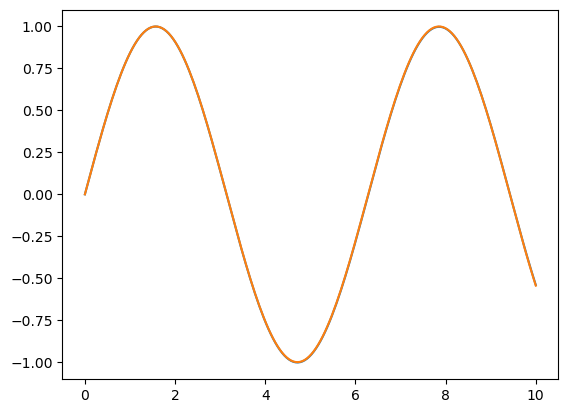

In [21]:
t_test=np.linspace(0,10,200).reshape(200,1)
pt_t_test = Variable(torch.from_numpy(t_test).float(), requires_grad=False).to(device)
u_test=model(pt_t_test)
plt.plot(t_test,u_test.detach().numpy())
plt.plot(t_test, np.sin(t_test))

In [82]:
print(model(pt_t_bc))

tensor([[1.0027],
        [0.5034]], grad_fn=<AddmmBackward0>)
